# Churn - Broadband Service

Goals
* BI Dataset
* churn model with churn risk
  
[broandband churn data set](https://github.com/PacktPublishing/Data-Storytelling-with-Google-Data-Studio/blob/master/customer_churn_data.zip). Of the open source data sets, this seems to be the only one that spans multiple years. The data set spans 2 years (24 months) with 27,605 customers, approximately 500K rows, wit 5,506 churns.

The dataset has the following: columns = 
* ['month', 
* 'account_no', 
* 'tenure', 
* 'effective_start_date', 
* 'effective_end_date', 
* 'contract_month', 
* 'bill_amount', 
* 'bandwidth', 
* 'term_reason_code', 
* 'term_reason_description',
*  'complaint_cnt', 
*  'with_phone_service', 
*  'current_month_churn', 
*  'is_new_customer_account']

In real-life situations it is typical to also have information about customer demographics, such as (age, income category, billing/home location), usage patterns, and net promotor score.


# Notebook setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style
import pandas as pd
import numpy as np
import beautifulplots as bp
import seaborn as sns
import datetime as dt

In [2]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)

# Load Data

load the broadband company dataset from Storytelling with Looker book

In [3]:
datafolder='./data_broadband_service/'
filename='customer_churn_data.csv'

df = pd.read_csv(f'{datafolder}/{filename}', 
                 dtype={'term_reason_code':'string','term_reason_description':'string'},
                 parse_dates=['effective_start_date','effective_end_date'])

display(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510125 entries, 0 to 510124
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   month                    510125 non-null  int64         
 1   account_no               510125 non-null  object        
 2   tenure                   510125 non-null  int64         
 3   effective_start_date     508188 non-null  datetime64[ns]
 4   effective_end_date       508188 non-null  datetime64[ns]
 5   contract_month           508188 non-null  float64       
 6   bill_amount              510125 non-null  float64       
 7   bandwidth                510125 non-null  object        
 8   term_reason_code         5522 non-null    string        
 9   term_reason_description  5522 non-null    string        
 10  complaint_cnt            510125 non-null  int64         
 11  with_phone_service       510125 non-null  bool          
 12  current_month_ch

None

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
0,202112,93910412CNZO000065449,72,2017-12-28,2019-12-27,24.0,862.2900,275M,DSAT,Dissatisfied with service,0,False,True,0
1,202007,94074838CNZO000067822,49,2018-06-24,2020-06-23,24.0,6433.8300,25M,DSAT,Dissatisfied with service,0,True,True,0
2,202007,73069668CNZO000011157,160,2018-07-01,2020-06-30,24.0,699.6600,25M,DSAT,Dissatisfied with service,0,False,True,0
3,202009,93856268CPRL000077652,25,2018-09-03,2020-08-02,23.0,2930.2416,25M,DSAT,Dissatisfied with service,0,True,True,0
4,202008,76820802CNZO000026425,119,2018-08-22,2020-08-21,24.0,418.8600,1000M,DSAT,Dissatisfied with service,1,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510120,202206,96074711CNZO000096474,2,NaT,NaT,NaN,6294.6000,1000M (FTTO),<NA>,<NA>,0,False,False,0
510121,202205,96074711CNZO000096474,1,NaT,NaT,NaN,1404.0000,1000M (FTTO),<NA>,<NA>,0,False,False,1
510122,202205,96074711CNZO000096533,1,NaT,NaT,NaN,1404.0000,1000M,<NA>,<NA>,0,False,False,1
510123,202206,96074711CNZO000096533,2,NaT,NaT,NaN,6294.6000,1000M,<NA>,<NA>,0,False,False,0


columns

In [4]:
print(list(df.columns))

['month', 'account_no', 'tenure', 'effective_start_date', 'effective_end_date', 'contract_month', 'bill_amount', 'bandwidth', 'term_reason_code', 'term_reason_description', 'complaint_cnt', 'with_phone_service', 'current_month_churn', 'is_new_customer_account']


How man customers?

In [5]:
df.groupby('account_no')['account_no'].count().count()

27605

Nulls  
... as per the Looker Studio Storytelling the dataset is clean though needs some enhancment  
... effective_start_date and end date pertains to the contract start and end date ...modify in next section  
... contract_month corresponds to the contract length. Therefore we can make it zero when it is null

In [6]:
df.isnull().sum()/len(df)

month                      0.000000
account_no                 0.000000
tenure                     0.000000
effective_start_date       0.003797
effective_end_date         0.003797
contract_month             0.003797
bill_amount                0.000000
bandwidth                  0.000000
term_reason_code           0.989175
term_reason_description    0.989175
complaint_cnt              0.000000
with_phone_service         0.000000
current_month_churn        0.000000
is_new_customer_account    0.000000
dtype: float64

minimum and maximum effective_start_date and end date

In [7]:
print('min month =', df['month'].min())
print('max month =',   df['month'].max())

print('min effective_start_date =', df['effective_start_date'].min())
print('min effective_end_date =',   df['effective_end_date'].min())

print('max effective_start_date =', df['effective_start_date'].max())
print('max effective_end_date =',   df['effective_end_date'].max())



min month = 202007
max month = 202206
min effective_start_date = 2007-03-01 00:00:00
min effective_end_date = 2007-12-30 00:00:00
max effective_start_date = 2022-08-07 00:00:00
max effective_end_date = 2032-03-09 00:00:00


why does the date go to 2032  
... we see contract month is 120  -> 10 years    
... some special long contract

In [8]:
df[df['effective_end_date' ] > pd.to_datetime('2023-1-1')]

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
18,202108,95801130CNZO000090633,5,2021-03-19,2023-03-18,24.0,210.60,100M,DSAT,Dissatisfied with service,0,False,True,0
19,202108,95801130CNZO000090634,5,2021-03-19,2023-03-18,24.0,210.60,100M,DSAT,Dissatisfied with service,0,False,True,0
20,202107,95948121CNZO000091935,2,2021-06-11,2023-06-10,24.0,115.83,1000M,DSAT,Dissatisfied with service,2,False,True,0
640,202203,75181909CPRL000089962,15,2021-01-09,2023-01-08,24.0,924.30,100M,RNCV,Relocate to non-coverage area,0,False,True,0
641,202206,95370326CPRL000089985,17,2021-01-18,2023-01-17,24.0,196.56,100M,RNCV,Relocate to non-coverage area,0,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508187,202203,95315701CNZO000094684,1,2022-03-10,2032-03-09,120.0,0.00,1000M (FTTO),<NA>,<NA>,0,False,False,1
508188,202204,95315701CNZO000094685,2,2022-03-10,2032-03-09,120.0,0.00,1000M (FTTO),<NA>,<NA>,0,False,False,0
508189,202206,95315701CNZO000094685,4,2022-03-10,2032-03-09,120.0,0.00,1000M (FTTO),<NA>,<NA>,0,False,False,0
508190,202205,95315701CNZO000094685,3,2022-03-10,2032-03-09,120.0,0.00,1000M (FTTO),<NA>,<NA>,0,False,False,0


is term_reason_code null count == the same as churn_current_month False count   
... not the same ...   
... sometimes the churn decision is made a month or months before the final termination of service

In [9]:

print(' term_reason_code null count =' ,df['term_reason_code'].isnull().count() )
print(' current_month_churn count = ' , df[df['current_month_churn'] ==False][['current_month_churn']].count())
# Observe a couple of subscribers
display(df[df['account_no'] == '95801130CNZO000090633'].sort_values('month',ascending=True).tail(5))
display(df[df['account_no'] == '75181909CPRL000089962'].sort_values('month',ascending=True).tail(5)  )

 term_reason_code null count = 510125
 current_month_churn count =  current_month_churn    504619
dtype: int64


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
222784,202104,95801130CNZO000090633,1,2021-03-19,2023-03-18,24.0,210.6,100M,<NA>,<NA>,0,False,False,0
222783,202105,95801130CNZO000090633,2,2021-03-19,2023-03-18,24.0,210.6,100M,<NA>,<NA>,0,False,False,0
222785,202106,95801130CNZO000090633,3,2021-03-19,2023-03-18,24.0,210.6,100M,<NA>,<NA>,0,False,False,0
222786,202107,95801130CNZO000090633,4,2021-03-19,2023-03-18,24.0,210.6,100M,<NA>,<NA>,0,False,False,0
18,202108,95801130CNZO000090633,5,2021-03-19,2023-03-18,24.0,210.6,100M,DSAT,Dissatisfied with service,0,False,True,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
175655,202111,75181909CPRL000089962,11,2021-01-09,2023-01-08,24.0,924.3,100M,<NA>,<NA>,0,False,False,0
175648,202112,75181909CPRL000089962,12,2021-01-09,2023-01-08,24.0,924.3,100M,<NA>,<NA>,0,False,False,0
175644,202201,75181909CPRL000089962,13,2021-01-09,2023-01-08,24.0,924.3,100M,<NA>,<NA>,0,False,False,0
175652,202202,75181909CPRL000089962,14,2021-01-09,2023-01-08,24.0,924.3,100M,<NA>,<NA>,0,False,False,0
640,202203,75181909CPRL000089962,15,2021-01-09,2023-01-08,24.0,924.3,100M,RNCV,Relocate to non-coverage area,0,False,True,0


 sometimes we have a churn reason without ever gettng a current_month_churn == True


In [10]:
display(df[(df['current_month_churn']==False) & (df['term_reason_code'].notnull()) ])
display(df[df['account_no']=='74467655CNZO000076551'].sort_values('month',ascending=True).tail(5))
display(df[df['account_no']=='95203683CNZO000083647'].sort_values('month',ascending=True).tail(5))
display(df[df['account_no']=='94578580CNZO000075631'].sort_values('month',ascending=True).tail(5))
display(df[df['account_no']=='94841988CNZO000079476'].sort_values('month',ascending=True).tail(5))
display(df[df['account_no']=='74467655CNZO000076551'].sort_values('month',ascending=True).tail(5))

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
43,202205,95445441CNZO000086502,25,2020-05-15,2022-05-14,24.0,636.7959,100M,DSAT,Dissatisfied with service,0,True,False,0
101,202012,93880607CNZO000064998,62,2015-10-24,2017-10-23,24.0,245.7000,1000M,RNCV,Relocate to non-coverage area,0,False,False,0
489,202012,95170775CNZO000083304,14,2019-10-26,2021-10-25,24.0,163.8000,100M,RNCV,Relocate to non-coverage area,0,False,False,0
1565,202012,75426734CNZO000021971,133,2018-12-01,2020-11-30,24.0,3460.8600,1000M,TEXP,Too expensive,0,True,False,0
1599,202012,94773561CNZO000078429,25,2018-12-13,2020-12-12,24.0,698.4900,100M,TEXP,Too expensive,0,False,False,0
1629,202012,90930876CPRL000078259,24,2018-12-29,2020-12-28,24.0,286.2639,100M,TEXP,Too expensive,1,False,False,0
1632,202012,94840436CNZO000079451,24,2018-12-29,2020-12-28,24.0,193.2840,1000M,TEXP,Too expensive,0,False,False,0
2887,202205,94578580CNZO000075175,50,2021-04-01,2022-03-30,12.0,2594.2761,100M,TEXP,Too expensive,0,False,False,0
2888,202204,94578580CNZO000075175,49,2021-04-01,2022-03-30,12.0,2001.5307,100M,TEXP,Too expensive,0,False,False,0
2922,202206,94578580CNZO000075631,51,2020-04-15,2022-04-14,24.0,3151.9800,100M,TEXP,Too expensive,0,False,False,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
69822,202202,74467655CNZO000076551,45,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
69823,202203,74467655CNZO000076551,46,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
69831,202204,74467655CNZO000076551,47,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
3049,202205,74467655CNZO000076551,48,2020-05-28,2022-05-27,24.0,1009.71,100M,TEXP,Too expensive,0,True,False,0
3050,202206,74467655CNZO000076551,49,2020-05-28,2022-05-27,24.0,3779.10,100M,TEXP,Too expensive,0,True,False,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
67827,202202,95203683CNZO000083647,28,2019-11-11,2022-05-10,30.0,355.68,100M,<NA>,<NA>,0,False,False,0
67832,202203,95203683CNZO000083647,29,2019-11-11,2022-05-10,30.0,355.68,100M,<NA>,<NA>,0,False,False,0
67825,202204,95203683CNZO000083647,30,2019-11-11,2022-05-10,30.0,355.68,100M,<NA>,<NA>,0,False,False,0
3007,202205,95203683CNZO000083647,31,2019-11-11,2022-05-10,30.0,1525.68,100M,TEXP,Too expensive,0,False,False,0
3008,202206,95203683CNZO000083647,32,2019-11-11,2022-05-10,30.0,2110.68,100M,TEXP,Too expensive,0,False,True,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
63679,202202,94578580CNZO000075631,47,2020-04-15,2022-04-14,24.0,828.3600,100M,<NA>,<NA>,0,False,False,0
63674,202203,94578580CNZO000075631,48,2020-04-15,2022-04-14,24.0,828.3600,100M,<NA>,<NA>,0,False,False,0
2923,202204,94578580CNZO000075631,49,2020-04-15,2022-04-14,24.0,2001.5307,100M,TEXP,Too expensive,0,False,False,0
2924,202205,94578580CNZO000075631,50,2020-04-15,2022-04-14,24.0,2594.2761,100M,TEXP,Too expensive,0,False,False,0
2922,202206,94578580CNZO000075631,51,2020-04-15,2022-04-14,24.0,3151.9800,100M,TEXP,Too expensive,0,False,False,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
22624,202009,94841988CNZO000079476,21,2018-12-29,2020-12-28,24.0,105.3000,100M,<NA>,<NA>,0,False,False,0
22627,202010,94841988CNZO000079476,22,2018-12-29,2020-12-28,24.0,105.3000,100M,<NA>,<NA>,0,False,False,0
22626,202011,94841988CNZO000079476,23,2018-12-29,2020-12-28,24.0,105.3000,100M,<NA>,<NA>,0,False,False,0
3677,202012,94841988CNZO000079476,24,2018-12-29,2020-12-28,24.0,168.3279,100M,CLB,Closing Business,0,False,False,0
3676,202101,94841988CNZO000079476,25,2018-12-29,2020-12-28,24.0,1050.6600,100M,CLB,Closing Business,0,False,True,0


,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
69822,202202,74467655CNZO000076551,45,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
69823,202203,74467655CNZO000076551,46,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
69831,202204,74467655CNZO000076551,47,2020-05-28,2022-05-27,24.0,702.00,100M,<NA>,<NA>,0,True,False,0
3049,202205,74467655CNZO000076551,48,2020-05-28,2022-05-27,24.0,1009.71,100M,TEXP,Too expensive,0,True,False,0
3050,202206,74467655CNZO000076551,49,2020-05-28,2022-05-27,24.0,3779.10,100M,TEXP,Too expensive,0,True,False,0


Cancellation reason and code

In [11]:
display(df.groupby(['term_reason_code'])[['term_reason_code','term_reason_description']].agg('last'))


,term_reason_code,term_reason_description
term_reason_code,,
BLNG,BLNG,Billing issue
CLB,CLB,Closing Business
CUSB,CUSB,Customer bankruptcy
CUSN,CUSN,Don't need anymore
DSAT,DSAT,Dissatisfied with service
LCFS,LCFS,Lack of features
LSCV,LSCV,Low speed coverage
NCAP,NCAP,No capacity
NETP,NETP,Network issue


How many cancellatons?

In [12]:

df[df['current_month_churn']==True]['current_month_churn'].count()

5506

# Data Cleaning and Transforms

In [13]:
# customer input dataframe
display(df.head())

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
0,202112,93910412CNZO000065449,72,2017-12-28,2019-12-27,24.0,862.2900,275M,DSAT,Dissatisfied with service,0,False,True,0
1,202007,94074838CNZO000067822,49,2018-06-24,2020-06-23,24.0,6433.8300,25M,DSAT,Dissatisfied with service,0,True,True,0
2,202007,73069668CNZO000011157,160,2018-07-01,2020-06-30,24.0,699.6600,25M,DSAT,Dissatisfied with service,0,False,True,0
3,202009,93856268CPRL000077652,25,2018-09-03,2020-08-02,23.0,2930.2416,25M,DSAT,Dissatisfied with service,0,True,True,0
4,202008,76820802CNZO000026425,119,2018-08-22,2020-08-21,24.0,418.8600,1000M,DSAT,Dissatisfied with service,1,False,True,0



Enhanced DataFrame - dfe  ... These Go into Raw Data Warehouse Table ... ML Transforms on top of These

Add contract fields plus some additional fields
* add contract_status: In Contract, Out of Contract
* add months to contract expire
* fix current_month_churn: set true when there is non null churn reason, set True for last service date < global_last_month
  

BE AWARE ... probably because this is an open source dataset and data obfuscation ...
* be aware that some accounts appear in the data without is_new_service_account == 1 
* also be aware that some accounts dissapear without churn_month_churn == True
* thus looking an numbers like net adds or net addded revenue will not be accurate



Transformation Functions

In [14]:
# dates ... contract and billing dates
#  ... ensure sort ascending by billing_year_month
def contract_and_billing_dates_func(df):
    df['year_month']=df['month']   # month is really year_month
    df = df.drop('month',axis=1)   # drop the original month variable
    df['billing_year']=(df['year_month']/100).astype(int)   # 
    df['billing_month']=(df['year_month']%100).astype(int)  # remainder part is the month
    df[df['effective_start_date'].isnull()]
    df['billing_month_str'] = df['billing_month'].apply(lambda x: str(x) if x > 9 else '0'+ str(x) )
    df['billing_year_month']=pd.to_datetime( df['billing_year'].astype(str) + df['billing_month_str'] +'01' ) # 01 -> first day
    df.rename({'effective_start_date':'contract_start_date','effective_end_date':'contract_end_date' },axis=1, inplace=True)
    df['contract_start_year'] = df['contract_start_date'].dt.year
    df['contract_start_month'] = df['contract_start_date'].dt.month
    df['contract_end_year'] = df['contract_end_date'].dt.year
    df['contract_end_month'] = df['contract_end_date'].dt.month
    df = df.sort_values('billing_year_month',ascending=True)
    return df

# fill contract_month ... contract month = 0 if no contract dates
def fill_contract_month_func(df):
    df['contract_month'] = df['contract_month'].fillna(0) # fillna contract_month to 0
    return df

# function month_diff_dates
def month_diff_dates_func(d1,d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month


# apply function months_to_expire
def months_to_expire_apply(r,billing_ym='billing_ym'):
  months_to_expire=np.NaN
  # billing_year_month is number of months to contract_end ... negative if billing_year_month is after contract end
  # ... if contract start date is in the future then assume it is renewed and months to expire is to the new contract_end date
  months_to_expire = month_diff_dates_func(r[billing_ym],r['contract_end_date']) # note... negative if billing_year month is after contract end
  # corner case with months to expire is NaN ... because no contract .. in this case fill with 0
  months_to_expire = 0 if r['contract_month']==0 else months_to_expire
  return months_to_expire

# function months to expire
def months_to_expire_func(df):
    df['billing_ym'] = pd.to_datetime((10000*df['billing_year']+100*df['billing_month']+1).astype(str))
    df['months_to_expire'] = df.apply(lambda r: months_to_expire_apply(r),axis=1)
    df.drop(['billing_ym'],axis=1, inplace=True)
    return df

# first churn month function
def first_churn_month_func(df):
    # current_month_churn == True if there is a term reason
    df['current_month_churn'] = df.apply(lambda r: True if isinstance(r['term_reason_code'],str) else False, axis=1 ) # current_month_churn = True 
    # first churn month
    df['first_churn_month'] = df.apply(lambda r: r['billing_year_month'] if r['current_month_churn']== True else pd.to_datetime(np.NaN), axis=1)
    df['first_churn_month'] = df[['account_no', 'first_churn_month']].groupby('account_no').transform('first')
    
    #df_first_churn=df.sort_values(['account_no','billing_year_month']).groupby(['account_no'])[['first_churn_month']].agg('first').reset_index()
    return df

# contract_status 
def contract_status_apply(r,bym='billing_ym',contract_sy='contract_sy',contract_sm='contract_sm', 
                          contract_ey='contract_ey',contract_em = 'contract_em'):
  contract_status =''
  contract_status = 'In Contract' if r[bym]  >= r['contract_start_date'] and r[bym] <= r['contract_end_date'] else  'Out of Contract'
  # corner cases when billing year and month are the same as contract start and end year-month  but day falls out of the contract
  contract_status = 'In Contract' if r[contract_sy]==r['billing_year'] and r['contract_sm']==r['billing_month'] else contract_status
  contract_status = 'In Contract' if r[contract_ey]==r['billing_year'] and r['contract_em']==r['billing_month'] else contract_status
  # corner case when months to expire is >=0 ... set contract_status = 'In Contract' 
  contract_status = 'In Contract' if r['months_to_expire'] >= 0 and r['contract_month'] > 0 else contract_status
  return contract_status

def contract_status_func(df):
    df['billing_ym'] = pd.to_datetime((10000*df['billing_year']+100*df['billing_month']+1).astype(str))
    df['contract_sy'] = df['contract_start_date'].dt.year
    df['contract_sm'] = df['contract_start_date'].dt.month
    df['contract_ey'] = df['contract_end_date'].dt.year
    df['contract_em'] = df['contract_end_date'].dt.month
    df['contract_status'] = df.apply(lambda r: contract_status_apply(r), axis= 1 )
    df.drop(['billing_ym','contract_sy','contract_sm','contract_ey','contract_em'],axis=1, inplace=True)
    return df

# months since first churn
def months_since_first_churn_func(df):
    df['months_since_first_churn']= df.apply(lambda row: month_diff_dates_func(row['first_churn_month'],row['billing_year_month']) if row['current_month_churn']==True else np.NaN,axis=1)
    return df

# Customer is Churned
# months_since_first_churn is NaN prior to a churn decision ... to look for null situations or it will blow up
def customer_is_churned_apply(r):
    customer_is_churned=0
    if pd.isnull(r['months_since_first_churn']): 
       customer_is_churned=False
    else:
        if r['months_since_first_churn'] > 0:
            customer_is_churned=True
    return customer_is_churned

# customer is churned
def customer_is_churned_func(df):
    df['customer_is_churned']=df.apply(lambda r: customer_is_churned_apply(r), axis=1)
    return df

# clean up and rename columns and drop unnecessary columns
def cleanup_rename_and_drop_func(df):
    df.rename( {'year_month':'billing_yearmonth','billing_year_month':'billing_yearmonth_date'},axis=1, inplace=True)
    df.drop(['first_churn_month','billing_month_str',
          'contract_start_year','contract_start_month','contract_end_year','contract_end_month',] ,axis=1, inplace=True)

    return df



Transformation Pipeline

In [15]:
# create dfe = enhanced/clean/transformed dataframe
dfe= df.copy() # enriched

# contract and billing dates
# sorts ascending by billing_year_month
print('billing dates, contract_month, ...')
dfe = contract_and_billing_dates_func(dfe)  

# fill contract month with 0 ... this is true if there is no contract month
print('fill contract_month with 0 when there are no contract dates ...')
dfe = fill_contract_month_func(dfe)

# months to contract expire
#   ... set months_to_expire for no contract customers relative to the last_service_month
print('months to contract expire ...')
dfe = months_to_expire_func(dfe)

# contract status ... In Contract , Out of Contract ... if billing date is within start/end contract then in_contract else out_of_contract
print('contract status ...')
dfe = contract_status_func(dfe)

# first churn month
print('first churn month ...')
dfe = first_churn_month_func(dfe)

# months since first churn
print('calculate months since first churn month ...')
dfe = months_since_first_churn_func(dfe)

# Customer is Churned
print('customer_is_churned')
dfe = customer_is_churned_func(dfe)

# final cleanup Rename and Drop cols
print('cleanup ... rename columns and drop unecessary columns ...')
dfe = cleanup_rename_and_drop_func(dfe)

display(dfe)


billing dates, contract_month, ...
fill contract_month with 0 when there are no contract dates ...
months to contract expire ...
contract status ...
first churn month ...
calculate months since first churn month ...
customer_is_churned
cleanup ... rename columns and drop unecessary columns ...


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,40,In Contract,NaN,False
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,2020-07-01,28,In Contract,NaN,False
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,2020-07-01,36,In Contract,NaN,False
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,0,In Contract,NaN,False
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,23,In Contract,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,7,In Contract,NaN,False
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,22,In Contract,NaN,False
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,7,In Contract,NaN,False
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,22,In Contract,NaN,False


In [16]:
dfe[dfe['customer_is_churned']>0]

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
490,95170775CNZO000083304,15,2019-10-26,2021-10-25,24.0,163.8000,100M,RNCV,Relocate to non-coverage area,0,False,True,0,202101,2021,1,2021-01-01,9,In Contract,1.0,True
1630,90930876CPRL000078259,25,2018-12-29,2020-12-28,24.0,1050.6600,100M,TEXP,Too expensive,1,False,True,0,202101,2021,1,2021-01-01,-1,Out of Contract,1.0,True
1631,94840436CNZO000079451,25,2018-12-29,2020-12-28,24.0,1130.2200,1000M,TEXP,Too expensive,0,False,True,0,202101,2021,1,2021-01-01,-1,Out of Contract,1.0,True
1564,75426734CNZO000021971,134,2018-12-01,2020-11-30,24.0,4367.5749,1000M,TEXP,Too expensive,0,True,True,0,202101,2021,1,2021-01-01,-2,Out of Contract,1.0,True
1598,94773561CNZO000078429,26,2018-12-13,2020-12-12,24.0,1054.1700,100M,TEXP,Too expensive,0,False,True,0,202101,2021,1,2021-01-01,-1,Out of Contract,1.0,True
100,93880607CNZO000064998,63,2015-10-24,2017-10-23,24.0,245.7000,1000M,RNCV,Relocate to non-coverage area,0,False,True,0,202101,2021,1,2021-01-01,-39,Out of Contract,1.0,True
3676,94841988CNZO000079476,25,2018-12-29,2020-12-28,24.0,1050.6600,100M,CLB,Closing Business,0,False,True,0,202101,2021,1,2021-01-01,-1,Out of Contract,1.0,True
2887,94578580CNZO000075175,50,2021-04-01,2022-03-30,12.0,2594.2761,100M,TEXP,Too expensive,0,False,True,0,202205,2022,5,2022-05-01,-2,Out of Contract,1.0,True
2924,94578580CNZO000075631,50,2020-04-15,2022-04-14,24.0,2594.2761,100M,TEXP,Too expensive,0,False,True,0,202205,2022,5,2022-05-01,-1,Out of Contract,1.0,True
44,95445441CNZO000086502,26,2020-05-15,2022-05-14,24.0,1050.6600,100M,DSAT,Dissatisfied with service,0,True,True,0,202206,2022,6,2022-06-01,-1,Out of Contract,1.0,True


In [8]:
display(dfe[dfe['months_since_first_churn']>0])

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,last_service_year_month,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
490,95170775CNZO000083304,15,2019-10-26,2021-10-25,24.0,163.8000,100M,RNCV,Relocate to non-coverage area,0,False,True,0,202101,2021,1,2021-01-01,2021-01-01,9,In Contract,1.0,True
1630,90930876CPRL000078259,25,2018-12-29,2020-12-28,24.0,1050.6600,100M,TEXP,Too expensive,1,False,True,0,202101,2021,1,2021-01-01,2021-01-01,-1,Out of Contract,1.0,True
1631,94840436CNZO000079451,25,2018-12-29,2020-12-28,24.0,1130.2200,1000M,TEXP,Too expensive,0,False,True,0,202101,2021,1,2021-01-01,2021-01-01,-1,Out of Contract,1.0,True
1564,75426734CNZO000021971,134,2018-12-01,2020-11-30,24.0,4367.5749,1000M,TEXP,Too expensive,0,True,True,0,202101,2021,1,2021-01-01,2021-01-01,-2,Out of Contract,1.0,True
1598,94773561CNZO000078429,26,2018-12-13,2020-12-12,24.0,1054.1700,100M,TEXP,Too expensive,0,False,True,0,202101,2021,1,2021-01-01,2021-01-01,-1,Out of Contract,1.0,True
100,93880607CNZO000064998,63,2015-10-24,2017-10-23,24.0,245.7000,1000M,RNCV,Relocate to non-coverage area,0,False,True,0,202101,2021,1,2021-01-01,2021-01-01,-39,Out of Contract,1.0,True
3676,94841988CNZO000079476,25,2018-12-29,2020-12-28,24.0,1050.6600,100M,CLB,Closing Business,0,False,True,0,202101,2021,1,2021-01-01,2021-01-01,-1,Out of Contract,1.0,True
2887,94578580CNZO000075175,50,2021-04-01,2022-03-30,12.0,2594.2761,100M,TEXP,Too expensive,0,False,True,0,202205,2022,5,2022-05-01,2022-06-01,-2,Out of Contract,1.0,True
2924,94578580CNZO000075631,50,2020-04-15,2022-04-14,24.0,2594.2761,100M,TEXP,Too expensive,0,False,True,0,202205,2022,5,2022-05-01,2022-06-01,-1,Out of Contract,1.0,True
44,95445441CNZO000086502,26,2020-05-15,2022-05-14,24.0,1050.6600,100M,DSAT,Dissatisfied with service,0,True,True,0,202206,2022,6,2022-06-01,2022-06-01,-1,Out of Contract,1.0,True


make sure there are no negative months_since_first_churn

In [17]:
df_tmp=dfe[dfe['months_since_first_churn'].notnull()]
df_tmp[df_tmp['months_since_first_churn']<0]

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned


look at rows with months_since_first_churn > 0

In [18]:
dfe[dfe['account_no']=='95540175CNZO000087531']

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
17382,95540175CNZO000087531,0,2020-07-31,2020-08-27,1.0,0.0,30M,<NA>,<NA>,0,False,False,1,202007,2020,7,2020-07-01,1,In Contract,NaN,False


Accounts appear in the dataset after the first tenure month   
... makes sense since the data represents 24 months  
... customers often start service before the beginning of the dataset  
... however, we do assume if a customer exits prior to the end of the data set that they churn

... accounts are added that are not new accounts ... this will affect statistic  
... often accounts stop reporting without churn ... this will affect statistics

In [19]:
dftmp = df.copy()

def contract_and_billing_dates_func(df):
    df['year_month']=df['month']   # month is really year_month
    df = df.drop('month',axis=1)   # drop the original month variable
    df['billing_year']=(df['year_month']/100).astype(int)   # 
    df['billing_month']=(df['year_month']%100).astype(int)  # remainder part is the month
    df[df['effective_start_date'].isnull()]
    df['billing_month_str'] = df['billing_month'].apply(lambda x: str(x) if x > 9 else '0'+ str(x) )
    df['billing_year_month']=pd.to_datetime( df['billing_year'].astype(str) + df['billing_month_str'] +'01' ) # 01 -> first day
    df.rename({'effective_start_date':'contract_start_date','effective_end_date':'contract_end_date' },axis=1, inplace=True)
    df['contract_start_year'] = df['contract_start_date'].dt.year
    df['contract_start_month'] = df['contract_start_date'].dt.month
    df['contract_end_year'] = df['contract_end_date'].dt.year
    df['contract_end_month'] = df['contract_end_date'].dt.month
    df = df.sort_values('billing_year_month',ascending=True)
    return df

# first seen year_month 
# ... this is the first observed service date
# ... global last servmice month
def first_last_seen_year_month_func(df):
    df[['first_seen_year_month']]=df.groupby('account_no')[['billing_year_month']].transform('first')
    df[['last_service_year_month']]=df.groupby('account_no')[['billing_year_month']].transform('last')
    return df


dftmp = contract_and_billing_dates_func(dftmp)


# global_last_service_month
global_last_service_month = dftmp['billing_year_month'].max()
print('global_last_service_month =',global_last_service_month)

dftmp = first_last_seen_year_month_func(dftmp)

print('dftmp')
display(dftmp.head())

# find accounts that dissapear without churn

# first seen ... be aware there are many accounts added throughout that are not new accounts 
print('dftmp_first_seen')
print('   several accounts added and is_new_customer_account = 0 ... not new customers')
dftmp_first_seen = dftmp[dftmp['first_seen_year_month']==dftmp['billing_year_month']] 
display(dftmp_first_seen)


# last seen ... be aware there are accounts that stop reporting that are not churn
dftmp_last_seen = dftmp[dftmp['last_service_year_month']==dftmp['billing_year_month']] 
print('dftmp_last_last_seen')
print('   in several cases dissapear without churn ')
display(dftmp_last_seen)


global_last_service_month = 2022-06-01 00:00:00
dftmp


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year_month,billing_year,billing_month,billing_month_str,billing_year_month,contract_start_year,contract_start_month,contract_end_year,contract_end_month,first_seen_year_month,last_service_year_month
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2021.0,11.0,2023.0,11.0,2020-07-01,2022-06-01
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,07,2020-07-01,2020.0,11.0,2022.0,11.0,2020-07-01,2022-06-01
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,07,2020-07-01,2021.0,7.0,2023.0,7.0,2020-07-01,2022-06-01
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2018.0,1.0,2020.0,7.0,2020-07-01,2022-06-01
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2020.0,6.0,2022.0,6.0,2020-07-01,2020-11-01


dftmp_first_seen
   several accounts added and is_new_customer_account = 0 ... not new customers


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year_month,billing_year,billing_month,billing_month_str,billing_year_month,contract_start_year,contract_start_month,contract_end_year,contract_end_month,first_seen_year_month,last_service_year_month
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2021.0,11.0,2023.0,11.0,2020-07-01,2022-06-01
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,07,2020-07-01,2020.0,11.0,2022.0,11.0,2020-07-01,2022-06-01
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,07,2020-07-01,2021.0,7.0,2023.0,7.0,2020-07-01,2022-06-01
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2018.0,1.0,2020.0,7.0,2020-07-01,2022-06-01
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2020.0,6.0,2022.0,6.0,2020-07-01,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223962,95842217CNZO000091037,15,2021-03-20,2023-03-19,24.0,231.66,1000M,<NA>,<NA>,0,False,False,1,202206,2022,6,06,2022-06-01,2021.0,3.0,2023.0,3.0,2022-06-01,2022-06-01
446705,76669431CPRL000096265,3,2022-04-14,2024-04-13,24.0,0.00,100M,<NA>,<NA>,0,True,False,1,202206,2022,6,06,2022-06-01,2022.0,4.0,2024.0,4.0,2022-06-01,2022-06-01
444753,95840963CNZO000091027,15,2021-04-09,2024-04-08,36.0,980.46,1000M,<NA>,<NA>,0,False,False,1,202206,2022,6,06,2022-06-01,2021.0,4.0,2024.0,4.0,2022-06-01,2022-06-01
450364,96464094CNZO000096461,2,2022-04-22,2024-04-21,24.0,0.00,1000M,<NA>,<NA>,0,False,False,1,202206,2022,6,06,2022-06-01,2022.0,4.0,2024.0,4.0,2022-06-01,2022-06-01


dftmp_last_last_seen
   in several cases dissapear without churn 


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year_month,billing_year,billing_month,billing_month_str,billing_year_month,contract_start_year,contract_start_month,contract_end_year,contract_end_month,first_seen_year_month,last_service_year_month
17382,95540175CNZO000087531,0,2020-07-31,2020-08-27,1.0,0.00,30M,<NA>,<NA>,0,False,False,1,202007,2020,7,07,2020-07-01,2020.0,7.0,2020.0,8.0,2020-07-01,2020-07-01
353484,95156071CNZO000083164,9,2021-10-26,2023-10-25,24.0,373.23,1000M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2021.0,10.0,2023.0,10.0,2020-07-01,2020-07-01
122962,94767647CNZO000078345,21,2020-10-20,2022-10-19,24.0,526.50,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2020.0,10.0,2022.0,10.0,2020-07-01,2020-07-01
122963,94767647CPRL000078346,21,2020-10-20,2022-10-19,24.0,526.50,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,07,2020-07-01,2020.0,10.0,2022.0,10.0,2020-07-01,2020-07-01
4547,94609559CNZO000075681,27,2018-04-22,2020-04-21,24.0,489.06,100M,ODTR,Overdue termination,0,False,True,0,202007,2020,7,07,2020-07-01,2018.0,4.0,2020.0,4.0,2020-07-01,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,<NA>,0,False,False,0,202206,2022,6,06,2022-06-01,2021.0,1.0,2023.0,1.0,2021-02-01,2022-06-01
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,06,2022-06-01,2022.0,4.0,2024.0,4.0,2020-07-01,2022-06-01
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,06,2022-06-01,2021.0,1.0,2023.0,1.0,2020-07-01,2022-06-01
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,<NA>,0,False,False,0,202206,2022,6,06,2022-06-01,2022.0,4.0,2024.0,4.0,2020-07-01,2022-06-01


# Feature Engineering

* remove rows where months_since_first_churn > 0
* add months since complaint


In [20]:
dfe.head()

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,40,In Contract,NaN,False
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,2020-07-01,28,In Contract,NaN,False
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,<NA>,0,True,False,0,202007,2020,7,2020-07-01,36,In Contract,NaN,False
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,0,In Contract,NaN,False
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,<NA>,0,False,False,0,202007,2020,7,2020-07-01,23,In Contract,NaN,False


In [21]:
# create the dfml dataframe
dfml = dfe.copy()

# remove rows where months_since_first_churn is more than a month
print('drop customer is churned rows')
dfml.drop(dfml[dfml['customer_is_churned']==True].index, inplace=True)  # drop customer is churned ... these distract the ml model ... predict customers that hvve not yet churned

# features that require history to compute         
# months since complaint 
# ... add previous complaint month ... fill forward
# ... complaints
#.... monts_since_complaint
Nmaxmonths=200  # needed for a default months since complaint (i.e., no complaint)
print('  Nmaxmonths =', Nmaxmonths)
print('months_since_complaint ...')
dfml['complaints_month'] = dfml['complaint_cnt']-dfml['complaint_cnt'].shift(1)  # complaints this month
dfml['complaints_month'] = dfml['complaints_month'].fillna(0)  # fill with 0 if no complaint this month
dfml['complaint_id'] = dfml['complaints_month'].apply(lambda x: 1 if x > 0 else 0) # complaint id 
dfml['complaint_id'] = dfml.groupby('account_no')[['complaint_id']].cumsum() # complaint id ... adds 1 for each complaint ... starts at 0
dfml['months_since_complaint'] = 1 # will sum this to get months since complaint
dfml['months_since_complaint'] = dfml.groupby(['account_no','complaint_id'])['months_since_complaint'].cumsum() # groupby complaint_id ... cumsum to get months since complaint
# = Nmaxmonths if complaint_id = 0 ...it there are no complaints make equql to max months
dfml['months_since_complaint'] = dfml.apply(lambda row: Nmaxmonths if row['complaint_id'] == 0  else row['months_since_complaint'] , axis=1 )

# Feature Store ... billing_amount_r3avg requires history
# bill_aumount statistics
# ... billamount_lteNK ... add RefundMax to avoid negative numbers ... required by deskew
# ... billamount_gtNK
# ... billamount_gtNK_cumsum ... get a sense of the maginitude of monthly paymens greater than 1K
# ... dynamic billing over the past 3 months ... r3r6avg = r3avg/r6avg ... note a std does not capture above and below the mean as this does

print('bill amount statistics...')
RefundMax=1000  # needed to shift billamount_ltNk to avoid negative and deskew
def lte_f(x,N):
    x = x.apply(lambda x: x if x <= N else 0)
    return x

def gt_f(x,N):
    x = x.apply(lambda x: x if x > N else 0)
    return x

Nk = 1
print('  Nk = ',Nk)
dfml['billamount_lteNk']=dfml.groupby('account_no')['bill_amount'].transform(lambda x: lte_f(x,Nk*1000)) + RefundMax
dfml['billamount_gtNk']=dfml.groupby('account_no')['bill_amount'].transform(lambda x: gt_f(x,Nk*1000))
dfml['billamount_lteNk_r3avg']=dfml.groupby('account_no')['bill_amount'].transform(lambda x: x.rolling(3,1).mean())  # min_periods 1 ensures no NaNs
dfml['billamount_lteNk_r6avg']=dfml.groupby('account_no')['bill_amount'].transform(lambda x: x.rolling(6,1).mean())  # min_periods 1 ensures no NaNs
dfml['billamount_lteNk_r3r6avg']=dfml['billamount_lteNk_r3avg']/dfml['billamount_lteNk_r6avg']
dfml['billamount_lteNk_r3r6avg']=dfml['billamount_lteNk_r3r6avg'].fillna(1)
dfml['billamount_gtNk_cumsum']=dfml.groupby('account_no')['billamount_gtNk'].cumsum()

# FEATURE STORE 
# months to expire
#print('mohths_toexpire_pNmax...')
#dfml['months_toexpire_pNmax'] = dfml['months_to_expire']+Nmaxmonths

# drop non ml columns 
# ... note we don't need both term_reason_code and term_reason_description
print('drop non ml columns')
dfml.drop(['months_since_first_churn','term_reason_description',
           'billing_yearmonth_date'],axis=1, inplace=True)


# current_month_churn 1 or 0
print('current month churn 1 or 0')
dfml['current_month_churn'] = dfml['current_month_churn'].apply(lambda x: 1 if x == True else 0)

# display dfml
print('dfml = ')
display(dfml)


drop customer is churned rows
  Nmaxmonths = 200
months_since_complaint ...
bill amount statistics...
  Nk =  1
drop non ml columns
current month churn 1 or 0
dfml = 


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,0,False,0,0,202007,2020,7,40,In Contract,False,0.0,0,200,1421.20,0.0,421.200,421.2000,1.000000,0.0000
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,0,True,0,0,202007,2020,7,28,In Contract,False,0.0,0,200,1604.89,0.0,604.890,604.8900,1.000000,0.0000
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,0,True,0,0,202007,2020,7,36,In Contract,False,0.0,0,200,1210.60,0.0,210.600,210.6000,1.000000,0.0000
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,0,False,0,0,202007,2020,7,0,In Contract,False,0.0,0,200,1362.70,0.0,362.700,362.7000,1.000000,0.0000
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,0,False,0,0,202007,2020,7,23,In Contract,False,0.0,0,200,1105.30,0.0,105.300,105.3000,1.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000


Variable Observations

look at numerical cols for outliers and symmetry    
* Months to expire
  * Months to expire can be negative ... so shift it, add constant ... 200 months should never exceed this ... 
* bill amount transforms
  * bill amount lt Nk ... lessthan_1k ... add RefundMax to avoid negative variable for the deskew since it has a long tail... deskew
  * bill amount gt Nk ... greaterthan_1k
  * bill amount_lt1k_r3avg ... 3 month average
  * bill amount_lt1k_r3r6avg ... ratio of 3 to 6 month avarage 
  * bill amount_gt1k_cumsum ... 
* deskew
  * billamount_lteNk
  * tenure

Define features - numerical, categorical - and label

In [22]:
num_features = ['tenure',  'billamount_lteNk', 'billamount_gtNk' ,  'billamount_gtNk_cumsum',  'contract_month', 'complaint_cnt', 
       'months_to_expire',  'complaints_month', 'months_since_complaint', 'billamount_lteNk_r3r6avg', 'billing_year']

cat_features = ['bandwidth','contract_status', 'is_new_customer_account',
       'with_phone_service',  'billing_month']

label = ['current_month_churn']

all_features = num_features + cat_features

Plot distributions

months_to_expire ... months_since_complaint ... tenure ... contract_month ... billamount_lteNk ... billamount_gtNk ... billamount_gtNk_cumsum ... billamount_lteNk_r3r6avg ... complaints_month ... 

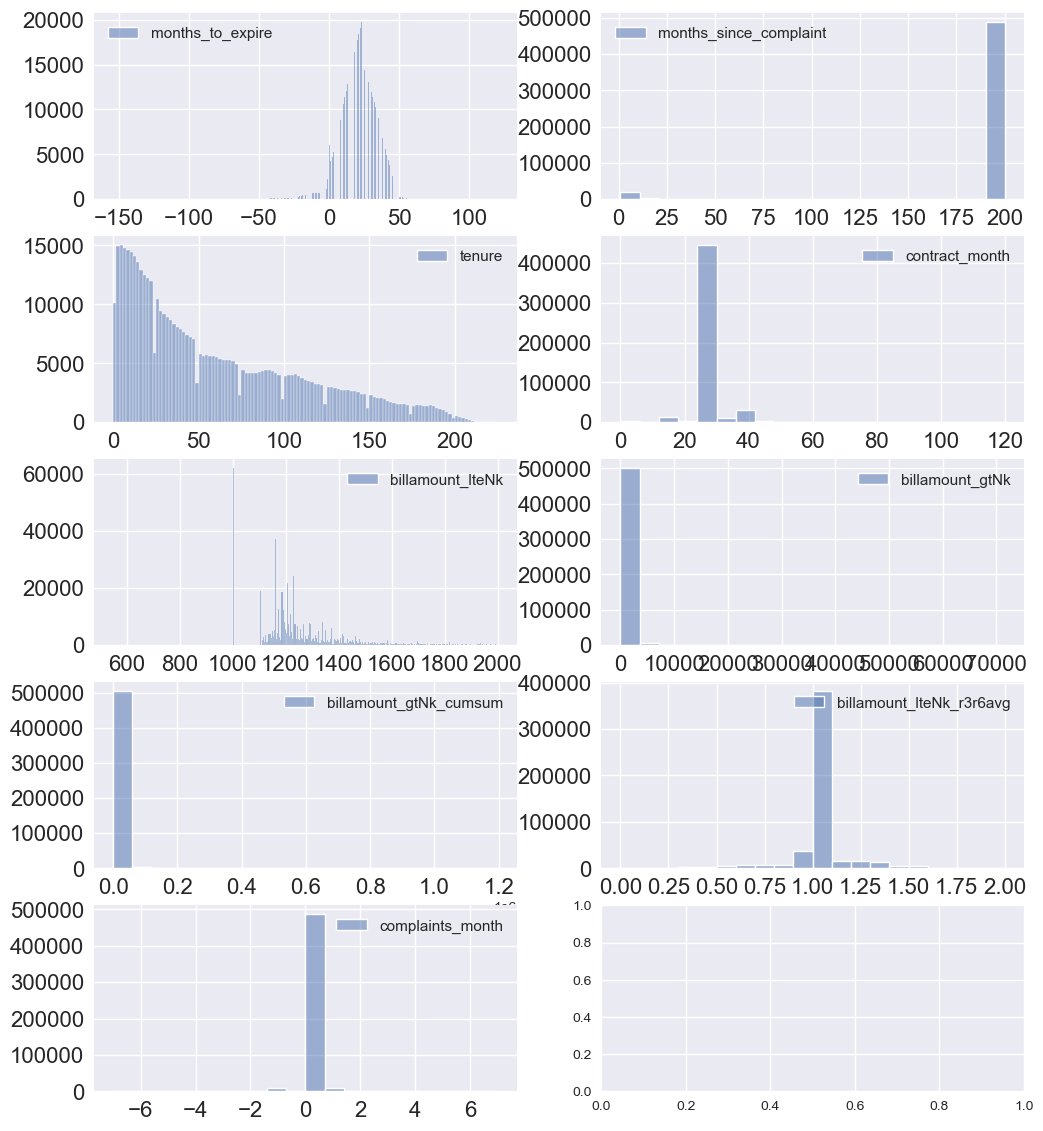

In [23]:

plot_variables=['months_to_expire','months_since_complaint','tenure','contract_month','billamount_lteNk', 'billamount_gtNk' , 
                'billamount_gtNk_cumsum','billamount_lteNk_r3r6avg','complaints_month']

plt.style.use('seaborn')
nrows,ncols = int(len(plot_variables)/2 + .5),2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,14))
plot_defaults_dict = bp.plot_defaults() # get matplotlib defaults dictionary from beautifulplots
sns.set(style="ticks")

rows_cols = [ (i,j) for i in range(0,nrows) for j in range(0,ncols)]
for n,ij in enumerate(rows_cols):
    if n < len(plot_variables):
        v = plot_variables[n]
        print(v, end =' ... ')
        x=dfml[[v]]
        _ax=ax[ij[0]][ij[1]]
        g=sns.histplot(data=x,ax=_ax)
        bp.set_axisparams(plot_defaults_dict,_ax,g) # set the axis parameters

plt.show()

Numberical Features

* once the billamount_getNk_cumsum gets very large the customr has invested in the service and is less likely to leave
* a large bill amount getNk can is correlated to churn
* negative months to expire is correlated with higher churn
* higher complaints per month is correlated to higher churn

,current_month_churn,tenure,billamount_lteNk,billamount_gtNk,billamount_gtNk_cumsum,contract_month,complaint_cnt,months_to_expire,complaints_month,months_since_complaint,billamount_lteNk_r3r6avg,billing_year
0,0,60.711664,1256.801518,325.688399,3240.396116,24.833810,0.028840,20.703139,-0.000145,191.494115,1.010223,2021.020804
1,1,59.696260,1282.340283,1024.703648,4282.439990,23.774691,0.040487,-2.693174,0.013253,190.128722,1.178022,2021.058642


features_set:


,current_month_churn,feature,value
0,0,billamount_lteNk,1256.801518
1,1,billamount_lteNk,1282.340283
2,0,billamount_gtNk,325.688399
3,1,billamount_gtNk,1024.703648
4,0,billamount_gtNk_cumsum,3240.396116
5,1,billamount_gtNk_cumsum,4282.439990
6,0,billing_year,2021.020804
7,1,billing_year,2021.058642


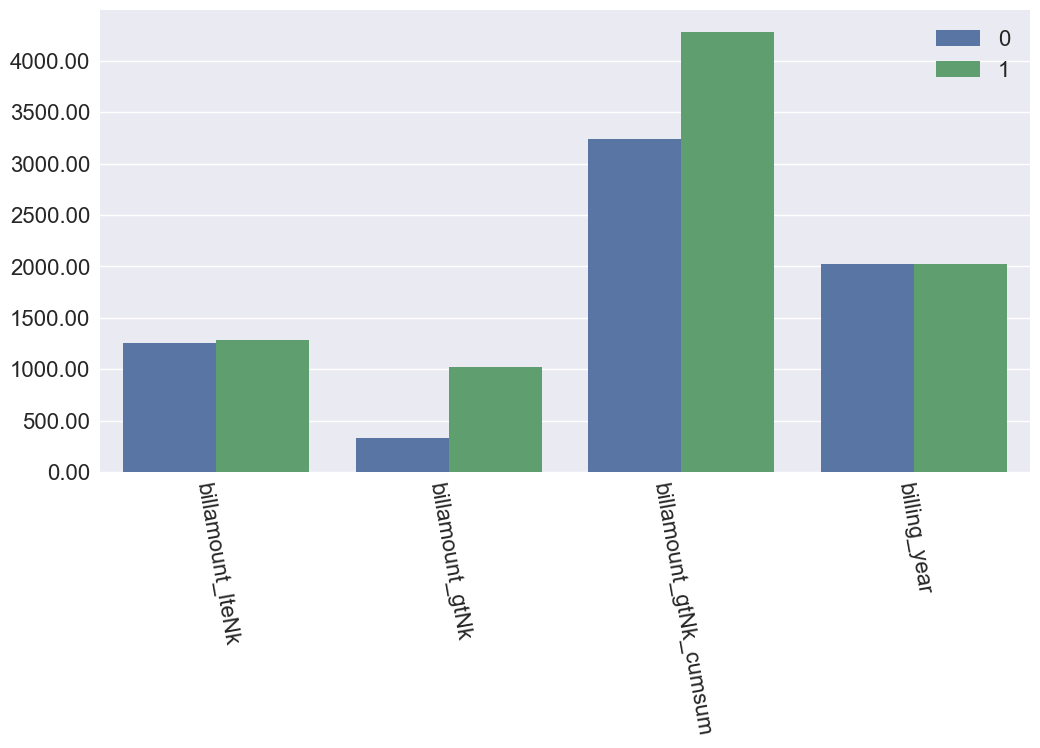

features_set:


,current_month_churn,feature,value
0,0,billamount_lteNk_r3r6avg,1.010223
1,1,billamount_lteNk_r3r6avg,1.178022
2,0,months_to_expire,20.703139
3,1,months_to_expire,-2.693174


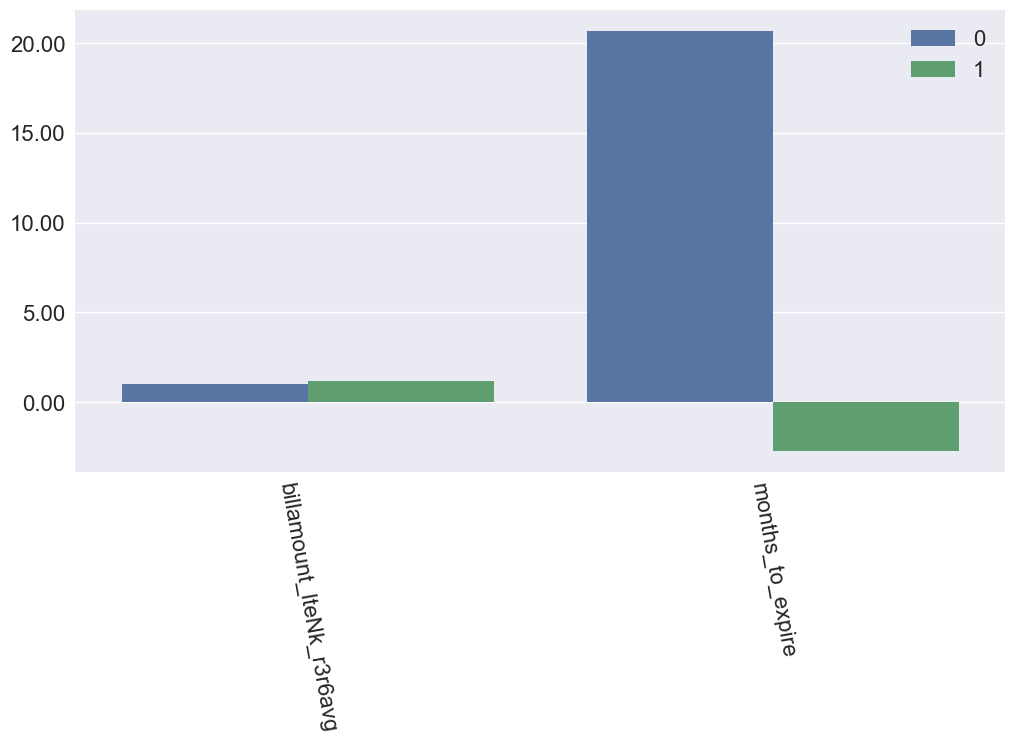

features_set:


,current_month_churn,feature,value
0,0,tenure,60.711664
1,1,tenure,59.696260
2,0,contract_month,24.833810
3,1,contract_month,23.774691
4,0,months_since_complaint,191.494115
5,1,months_since_complaint,190.128722


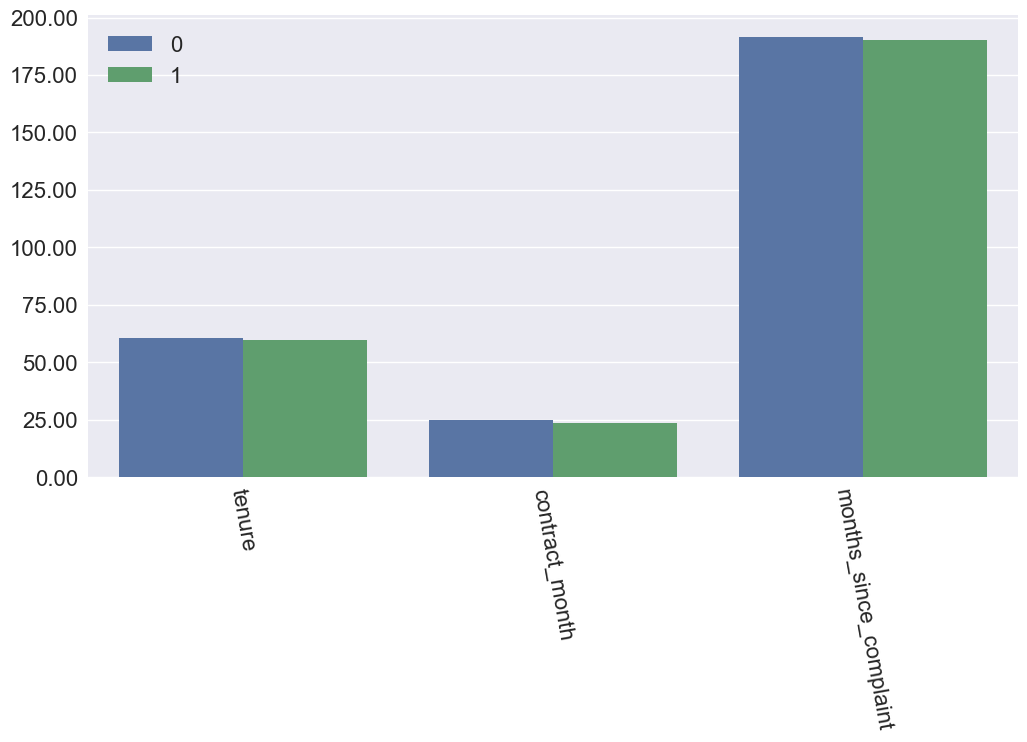

features_set:


,current_month_churn,feature,value
0,0,complaint_cnt,0.028840
1,1,complaint_cnt,0.040487
2,0,complaints_month,-0.000145
3,1,complaints_month,0.013253


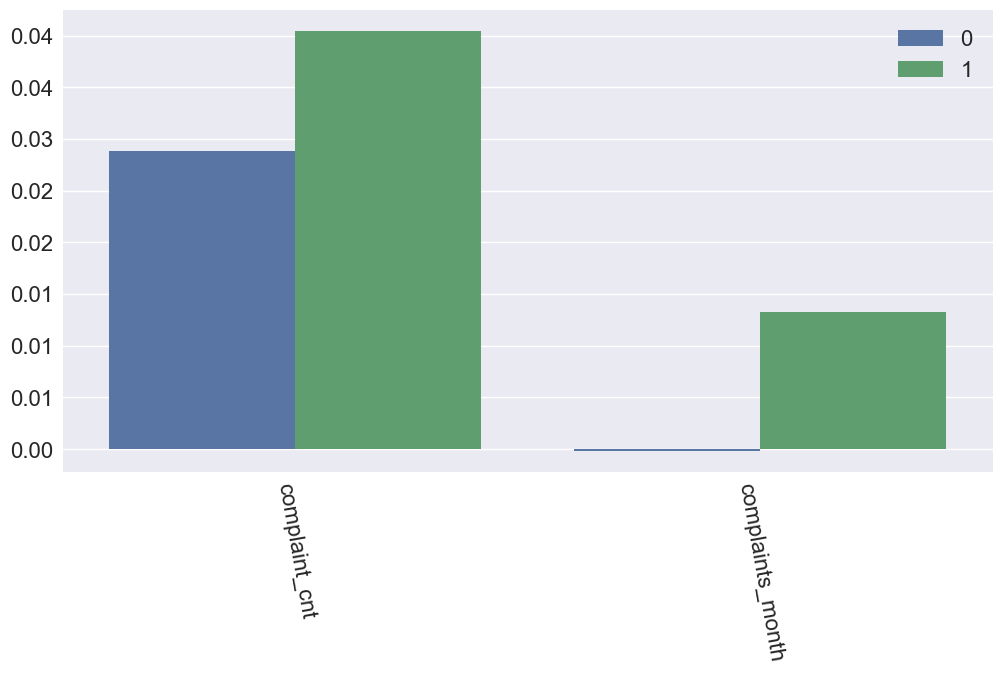

In [24]:
# retained customers
df_pred_num_avg = dfml.groupby(label)[num_features].mean().reset_index()
display(df_pred_num_avg )

# large and small valued features
large_features = ['billamount_lteNk','billamount_gtNk','billamount_gtNk_cumsum', 'billing_year']
small_features = ['billamount_lteNk_r3r6avg','months_to_expire']
verysmall_features = ['complaint_cnt','complaints_month']
medium_features = [f for f in num_features if ( f not in large_features) and (f not in small_features)and (f not in verysmall_features)]

for feature_set in [large_features,small_features,medium_features, verysmall_features ]:
    # melt into long format
    df_long_format = df_pred_num_avg[['current_month_churn']+ feature_set].copy()
    df_long_format=df_long_format.melt(id_vars=['current_month_churn'], var_name = 'feature', value_vars=feature_set)
    print(f'features_set:')
    display(df_long_format)
    
    bp.barplot(df_long_format , 'feature','value',hue='current_month_churn' , figsize=(12,6),x_tick_rotation = -80 )


Categorical Features

* bandwidth
  * best retention with 1000M (FTTO)
  * highest churn with rate with 25M
* out_of_contract correlated with churn
* phone service
  * higher retention with phone service
  * higher churn without phone service

categorical features = ['bandwidth', 'contract_status', 'is_new_customer_account', 'with_phone_service', 'billing_month']
label = ['current_month_churn']
N_retention = 504603
N_churn = 5508


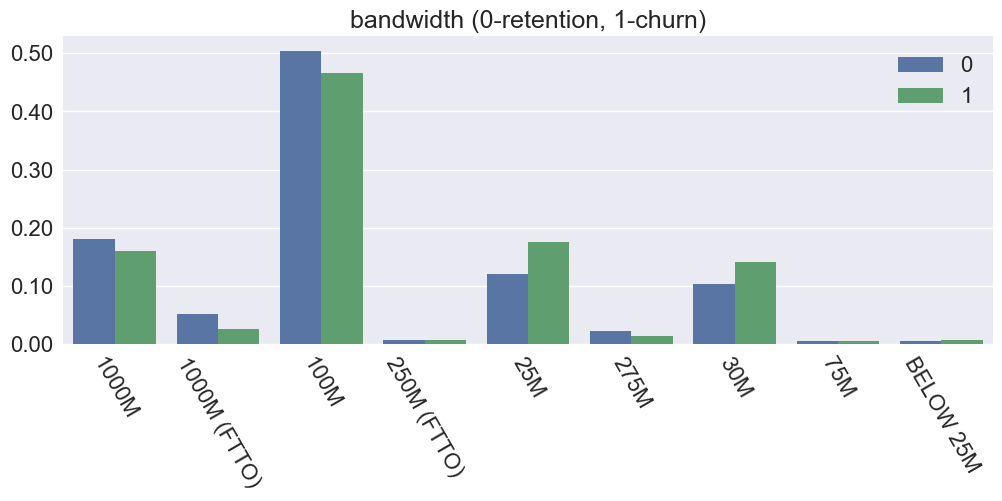

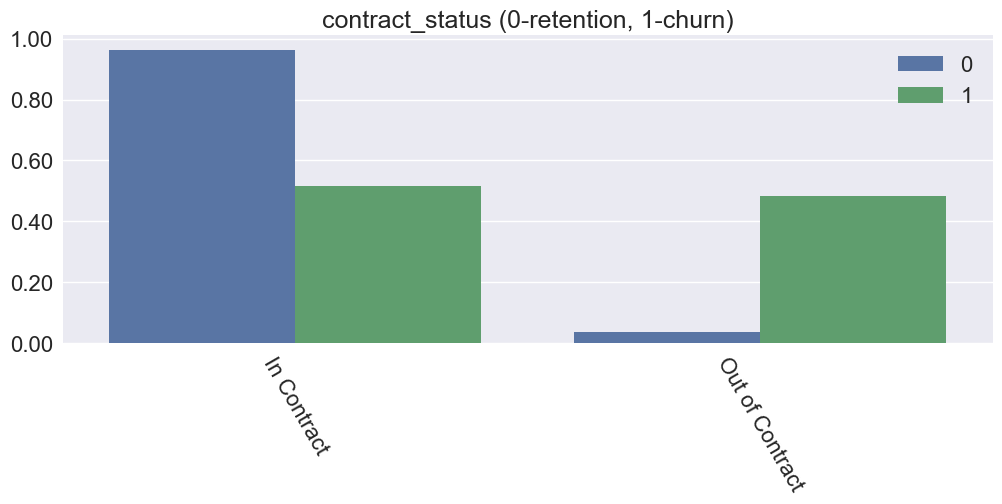

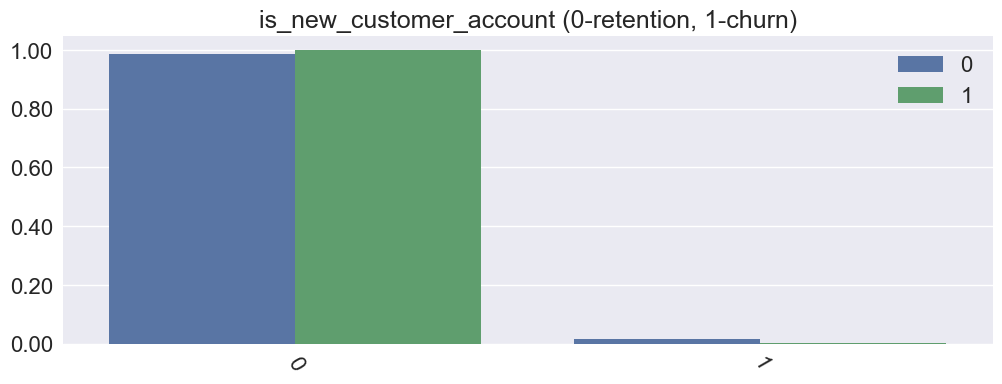

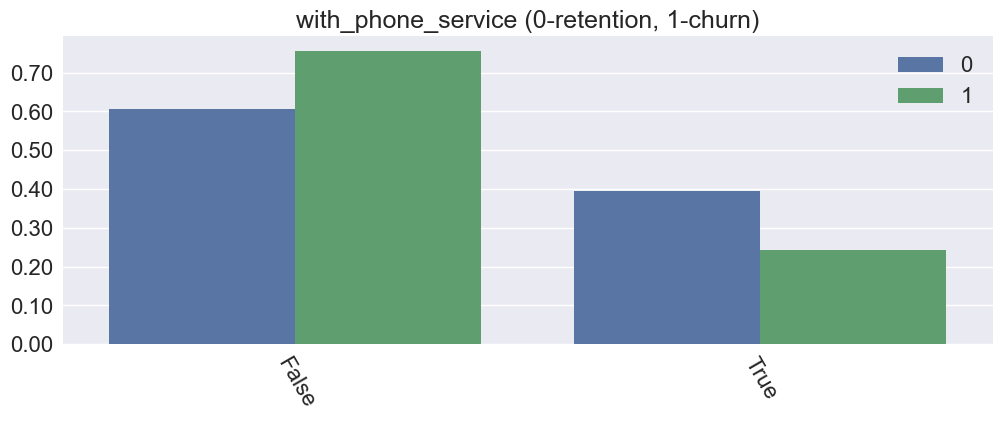

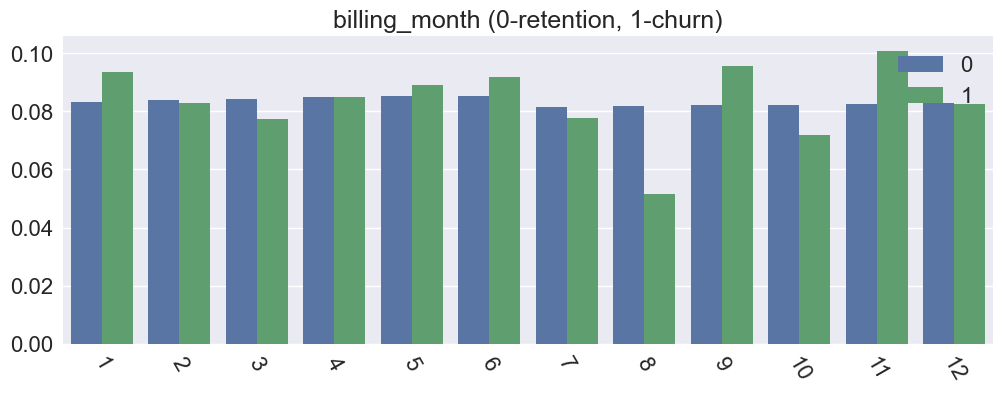

In [25]:
# categorical and label features
print(f'categorical features = {cat_features}')
print(f'label = {label}')

# total number of retentions and churns
N_retention = dfml[dfml[label]==0][label].count().values[0]
N_churn = dfml[dfml[label]==1][label].count().values[0]
print(f'N_retention = {N_retention}')
print(f'N_churn = {N_churn}')

# apply function percent
def cat_pct_func(r):
    denom = np.NaN
    if r['current_month_churn'] == 1: denom = N_churn
    elif r['current_month_churn'] == 0: denom = N_retention
    pct = r['count']/denom
    return pct

# plot percent churn and retention for each categorical feature
for v in cat_features:
    df_cat_pct=dfml.groupby(label + [v])[[v]].count() # categorical counts
    df_cat_pct.rename({v:'count'},axis=1,inplace=True) # cnange column name to count
    df_cat_pct.reset_index(inplace=True) # reset index
    df_cat_pct['percent'] = df_cat_pct.apply(lambda r: cat_pct_func(r), axis=1)

    bp.barplot(df_cat_pct, v,'percent',hue='current_month_churn' , title=f'{v} (0-retention, 1-churn)',
            figsize=(12,4),x_tick_rotation = -60 )

#display(df_pred_cat_pct)

Feature Correlations Heatmap

Defne Colormap

len(colors) = 10

(0.7807892204786299, 0.2560328637441959, 0.6174624352673969)
(0.8180930571075771, 0.4071096732001905, 0.6898937370517974)
(0.8553968937365242, 0.558186482656185, 0.762325038836198)
(0.8946965480757393, 0.717346154336841, 0.8386315365238235)
(0.9320003847046865, 0.8684229637928356, 0.911062838308224)
(0.9399131852069487, 0.865967067839219, 0.8710361408679982)
(0.9188508894678925, 0.7089677802273672, 0.724297837912955)
(0.896661725646257, 0.5435687678946526, 0.569708790094176)
(0.8755994299072009, 0.3865694802828008, 0.42297048713913266)
(0.8545371341681446, 0.22957019267094914, 0.2762321841840895)


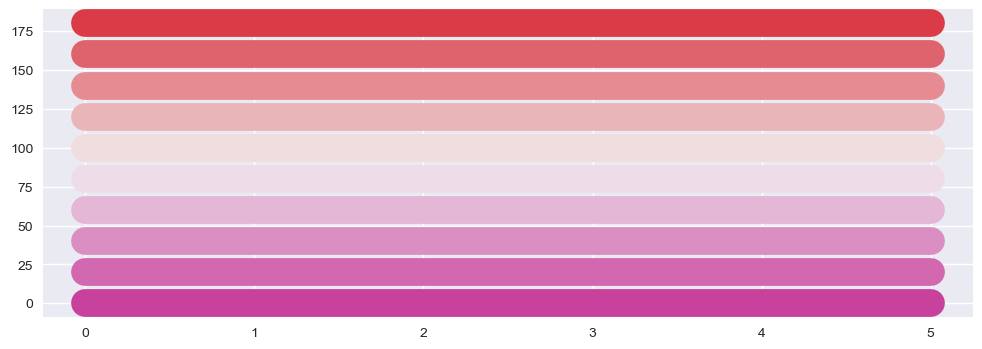

In [26]:
# SNS diverging color pallete
# https://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette

# https://seaborn.pydata.org/tutorial/color_palettes.html
# diverging color palette using husl color system
# hsl color in degrees... Hue: Hue is measured in a circle from zero (0) to 360 degrees as follows: 0 = red, 60 = yellow, 120 = green, 180 = cyan, 40 = blue, 300 = magenta.

# Color Maps Analytics Vidhya
# https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

# HUSL  ... Colors and Visualization
# https://ajaytech.co/2020/03/05/colors-in-visualization/
# diverging colors, cmap
h_neg = 330
h_pos = 10
sep = 75
lightness = 50
N = 10
center='light'
colors = sns.diverging_palette(h_neg, h_pos, s=sep, l=lightness, sep=1, n=N, center=center, as_cmap=False)
mycmap = sns.diverging_palette(h_neg, h_pos, s=sep, l=lightness, sep=1, n=N, center=center, as_cmap=True)
N  = len(colors)
print(f'len(colors) = {N}\n')

for c in colors:
    print(c)

# plot
plt.style.use('seaborn')
nrows,ncols = 1,1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,4))

#plot_defaults_dict = bp.plot_defaults() # get matplotlib defaults dictionary from beautifulplots
sns.set(style="ticks")

# plot rainbow of colors
#https://www.tutorialspoint.com/matplotlib-plot-lines-with-colors-through-colormap
Nx = 5
x = np.linspace(0, 5, Nx)
width=20
for i in np.arange(0,N,1):
    ax.plot(x,len(x)*[i*width], color = colors[i], linewidth=width)
    
#ax.axis(xmin=0,xmax=4)    
#ax.axis(ymin=0, ymax=500)
plt.show()

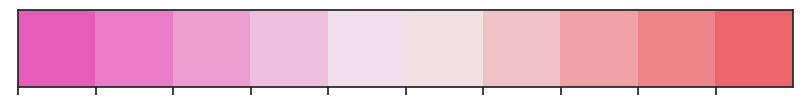

In [27]:
# https://pythonbasics.org/seaborn-palette/
sns.palplot(sns.diverging_palette(h_neg, h_pos, l=60, n=10, center="light"))
plt.show()

Matplotlib colormaps

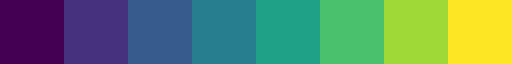

In [28]:
# https://www.scaler.com/topics/matplotlib/colormaps-matplotlib/
from matplotlib import cm
cm.get_cmap('viridis', 8)


In [29]:
# get a cmap and index with number betweein 0 and 1
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
cmap = matplotlib.cm.get_cmap('Spectral')
rgba = cmap(500)
print(rgba)


(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)


Normalize the color

In [30]:
# rgba ... RGBA color values are an extension of RGB color values with an alpha channel - which specifies the opacity for a color
#import colormap
from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.jet(norm(400),bytes=True) 
print(rgba_color)

cmap = matplotlib.cm.get_cmap('jet')
print(cmap(norm(400), bytes=True))


(41, 255, 205, 255)
(41, 255, 205, 255)


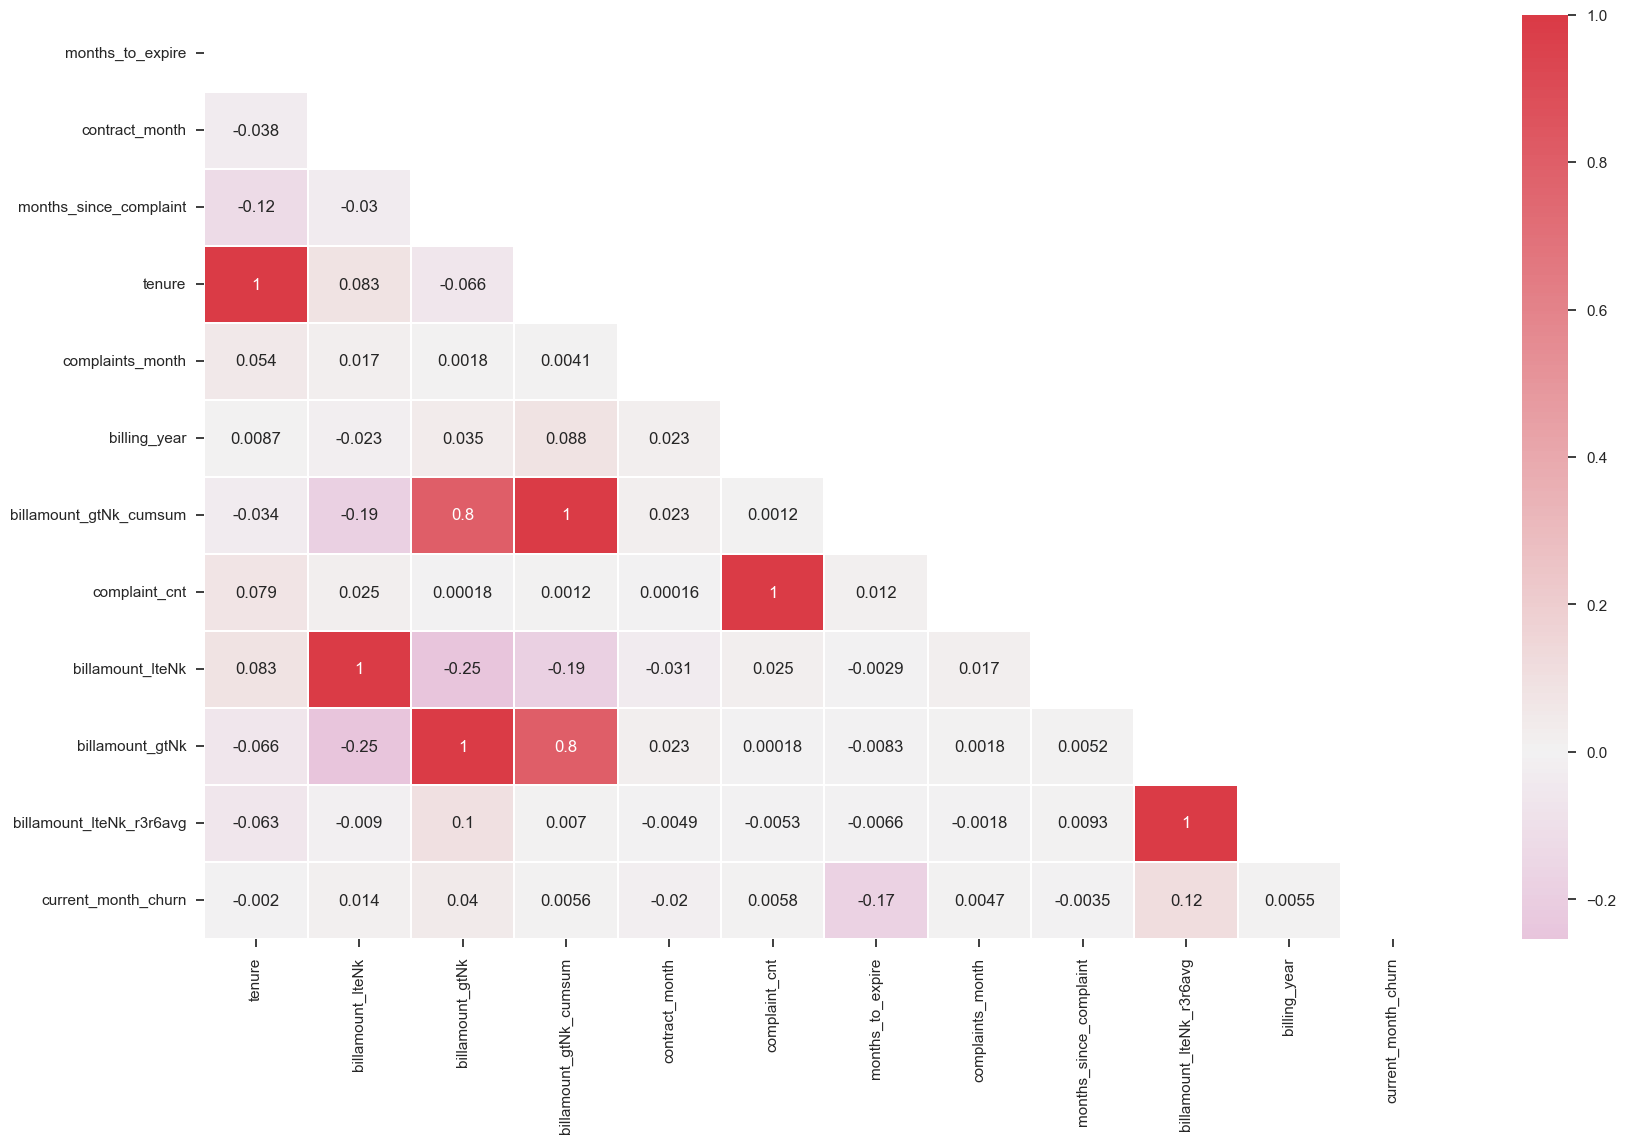

,current_month_churn
current_month_churn,1.000000
billamount_lteNk_r3r6avg,0.117340
billamount_gtNk,0.040487
billamount_lteNk,0.013937
complaint_cnt,0.005766
billamount_gtNk_cumsum,0.005574
billing_year,0.005547
complaints_month,0.004688
tenure,-0.002049
months_since_complaint,-0.003536


In [31]:
# correlation matrix
corr_cols = num_features + label
corr_matrix = dfml[corr_cols].corr().sort_values(label,ascending=True)


# plot the correlation matrix
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(20,12) )
upper_matrix = np.triu(corr_matrix)

my_cmap=sns.diverging_palette(10, 10, center='dark',  s=60, as_cmap=True) # -1 and +1 are red
sns.heatmap(corr_matrix, center=0, annot=True, linewidths=.3, cmap=mycmap, mask=upper_matrix, ax=ax)


plt.show()

display(corr_matrix.sort_values(label,ascending=False)[label])


Investigate specific variables

In [32]:

dfml[dfml['billamount_lteNk']<0].head()

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum


notice that the bill_amount increases for account_no =- '70068143CNZO000000062'

notice months since complaint

In [33]:
display(dfml[dfml['account_no']=='70068143CNZO000000062'].sort_values('billing_yearmonth').head(10))

display(dfml[dfml['account_no']=='70068143CNZO000000062'].sort_values('billing_yearmonth').tail(10))

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
324934,70068143CNZO000000062,202,2020-09-06,2023-09-05,36.0,208.26,100M,<NA>,0,False,0,0,202007,2020,7,38,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324936,70068143CNZO000000062,203,2020-09-06,2023-09-05,36.0,208.26,100M,<NA>,0,False,0,0,202008,2020,8,37,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324922,70068143CNZO000000062,204,2020-09-06,2023-09-05,36.0,208.26,100M,<NA>,0,False,0,0,202009,2020,9,36,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324938,70068143CNZO000000062,205,2020-09-06,2023-09-05,36.0,208.26,100M,<NA>,0,False,0,0,202010,2020,10,35,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324915,70068143CNZO000000062,206,2020-09-06,2023-09-05,36.0,208.26,100M,<NA>,0,False,0,0,202011,2020,11,34,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324927,70068143CNZO000000062,207,2020-09-06,2023-09-05,36.0,208.26,250M (FTTO),<NA>,0,False,0,0,202012,2020,12,33,In Contract,False,0.0,0,200,1208.26,0.0,208.26,208.26,1.000000,0.0
324919,70068143CNZO000000062,208,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202101,2021,1,32,In Contract,False,0.0,0,200,1290.16,0.0,235.56,221.91,1.061511,0.0
324920,70068143CNZO000000062,209,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202102,2021,2,31,In Contract,False,0.0,0,200,1290.16,0.0,262.86,235.56,1.115894,0.0
324928,70068143CNZO000000062,210,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202103,2021,3,30,In Contract,False,0.0,0,200,1290.16,0.0,290.16,249.21,1.164319,0.0
324925,70068143CNZO000000062,211,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202104,2021,4,29,In Contract,False,0.0,0,200,1290.16,0.0,290.16,262.86,1.103858,0.0


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
324916,70068143CNZO000000062,216,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202109,2021,9,24,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324918,70068143CNZO000000062,217,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202110,2021,10,23,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324930,70068143CNZO000000062,218,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202111,2021,11,22,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324933,70068143CNZO000000062,219,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202112,2021,12,21,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324929,70068143CNZO000000062,220,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202201,2022,1,20,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324923,70068143CNZO000000062,221,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202202,2022,2,19,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324931,70068143CNZO000000062,222,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202203,2022,3,18,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324935,70068143CNZO000000062,223,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202204,2022,4,17,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324924,70068143CNZO000000062,224,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202205,2022,5,16,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0
324921,70068143CNZO000000062,225,2020-09-06,2023-09-05,36.0,290.16,250M (FTTO),<NA>,0,False,0,0,202206,2022,6,15,In Contract,False,0.0,0,200,1290.16,0.0,290.16,290.16,1.0,0.0


In [34]:
dfml['months_since_complaint'].max()

200

In [35]:
dfml[ dfml['months_since_complaint'] < 999  ]

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,0,False,0,0,202007,2020,7,40,In Contract,False,0.0,0,200,1421.20,0.0,421.200,421.2000,1.000000,0.0000
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,0,True,0,0,202007,2020,7,28,In Contract,False,0.0,0,200,1604.89,0.0,604.890,604.8900,1.000000,0.0000
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,0,True,0,0,202007,2020,7,36,In Contract,False,0.0,0,200,1210.60,0.0,210.600,210.6000,1.000000,0.0000
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,0,False,0,0,202007,2020,7,0,In Contract,False,0.0,0,200,1362.70,0.0,362.700,362.7000,1.000000,0.0000
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,0,False,0,0,202007,2020,7,23,In Contract,False,0.0,0,200,1105.30,0.0,105.300,105.3000,1.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000


In [443]:
display(dfml[dfml['contract_status']=='Out of Contract'])

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status
42427,70076500CNZO000000073,218,2019-11-01,2021-10-30,24.0,3381.30,1000M,<NA>,0,False,False,0,202111,2021,11,-1,Out of Contract
42420,70076500CNZO000000073,219,2019-11-01,2021-10-30,24.0,270.27,1000M,<NA>,0,False,False,0,202112,2021,12,-2,Out of Contract
494,70076500CNZO000000073,220,2019-11-01,2021-10-30,24.0,270.27,1000M,RNCV,0,False,True,0,202201,2022,1,-3,Out of Contract
42440,70076500FVUS000057640,96,2019-11-01,2021-10-30,24.0,2632.50,25M,<NA>,0,False,False,0,202111,2021,11,-1,Out of Contract
42447,70076500FVUS000057640,97,2019-11-01,2021-10-30,24.0,175.50,25M,<NA>,0,False,False,0,202112,2021,12,-2,Out of Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38256,96274675CNZO000030839,127,2019-09-12,2021-09-11,24.0,190.71,1000M,<NA>,0,False,False,0,202203,2022,3,-6,Out of Contract
38252,96274675CNZO000030839,128,2019-09-12,2021-09-11,24.0,190.71,1000M,<NA>,0,False,False,0,202204,2022,4,-7,Out of Contract
38249,96274675CNZO000030839,129,2019-09-12,2021-09-11,24.0,190.71,1000M,<NA>,0,False,False,0,202205,2022,5,-8,Out of Contract
38254,96274675CNZO000030839,130,2019-09-12,2021-09-11,24.0,190.71,1000M,<NA>,0,False,False,0,202206,2022,6,-9,Out of Contract


In [36]:
display(dfml[dfml['contract_month']==0])

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
508358,76097005CPRL000086384,1,NaT,NaT,0.0,463.3200,100M,<NA>,0,True,0,0,202007,2020,7,0,Out of Contract,False,0.0,0,200,1463.32,0.0000,463.3200,463.3200,1.0,0.0000
508360,76097005CPRL000086500,1,NaT,NaT,0.0,463.3200,100M,<NA>,0,True,0,0,202007,2020,7,0,Out of Contract,False,0.0,0,200,1463.32,0.0000,463.3200,463.3200,1.0,0.0000
508362,76431626CNZO000025851,119,NaT,NaT,0.0,1544.0139,100M,<NA>,0,True,0,0,202007,2020,7,0,Out of Contract,False,0.0,0,200,1000.00,1544.0139,1544.0139,1544.0139,1.0,1544.0139
508355,76038728CPRL000065704,55,NaT,NaT,0.0,290.1600,1000M,<NA>,0,True,0,0,202007,2020,7,0,Out of Contract,False,0.0,0,200,1290.16,0.0000,290.1600,290.1600,1.0,0.0000
508332,75670562CNZO000087066,0,NaT,NaT,0.0,6879.6000,1000M,<NA>,0,True,0,1,202007,2020,7,0,Out of Contract,False,0.0,0,200,1000.00,6879.6000,6879.6000,6879.6000,1.0,6879.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508831,94262417CNZO000070378,65,NaT,NaT,0.0,0.0000,1000M (FTTO),<NA>,0,True,0,0,202206,2022,6,0,Out of Contract,False,0.0,0,200,1000.00,0.0000,0.0000,0.0000,1.0,0.0000
509665,95050662CNZO000082075,35,NaT,NaT,0.0,748.8000,100M,<NA>,0,False,0,0,202206,2022,6,0,Out of Contract,False,0.0,0,200,1748.80,0.0000,748.8000,748.8000,1.0,2658.5325
509611,94934601CNZO000080776,39,NaT,NaT,0.0,0.0000,1000M (FTTO),<NA>,0,False,0,0,202206,2022,6,0,Out of Contract,False,0.0,0,200,1000.00,0.0000,0.0000,0.0000,1.0,0.0000
510123,96074711CNZO000096533,2,NaT,NaT,0.0,6294.6000,1000M,<NA>,0,False,0,0,202206,2022,6,0,Out of Contract,False,0.0,0,200,1000.00,6294.6000,3849.3000,3849.3000,1.0,7698.6000


Churned rows ... 5738 of 510111 ... clearly and imbalanced dataset -> typical for churn scenarios

In [37]:
display(dfml[dfml['current_month_churn']==True])

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
4547,94609559CNZO000075681,27,2018-04-22,2020-04-21,24.0,489.0600,100M,ODTR,0,False,1,0,202007,2020,7,-3,Out of Contract,0,0.0,0,200,1489.0600,0.0000,489.0600,489.06000,1.000000,0.0000
4546,94026895CNZO000067110,51,2017-12-11,2020-04-10,28.0,228.1500,100M,ODTR,0,True,1,0,202007,2020,7,-3,Out of Contract,0,0.0,0,200,1228.1500,0.0000,228.1500,228.15000,1.000000,0.0000
4543,90737628CPRL000045018,98,2018-04-10,2020-04-09,24.0,816.6600,30M,ODTR,0,False,1,0,202007,2020,7,-3,Out of Contract,0,0.0,0,200,1816.6600,0.0000,816.6600,816.66000,1.000000,0.0000
4569,94617214CNZO000075810,26,2018-05-24,2020-05-23,24.0,1050.6600,100M,ODTR,0,False,1,0,202007,2020,7,-2,Out of Contract,0,0.0,0,200,1000.0000,1050.6600,1050.6600,1050.66000,1.000000,1050.6600
4582,94069929CNZO000067765,50,2018-06-06,2020-06-05,24.0,325.2600,25M,ODTR,0,True,1,0,202007,2020,7,-1,Out of Contract,0,0.0,0,200,1325.2600,0.0000,325.2600,325.26000,1.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,91977355CNZO000057811,109,2020-06-28,2022-06-27,24.0,7760.5398,25M,TEXP,0,True,1,0,202206,2022,6,0,In Contract,0,0.0,0,200,1000.0000,7760.5398,3730.8336,2672.71680,1.395896,45099.1008
3135,94672805CPRL000086939,24,2020-06-28,2022-06-27,24.0,769.0293,275M,TEXP,0,False,1,0,202206,2022,6,0,In Contract,0,0.0,0,200,1769.0293,0.0000,480.9831,408.97155,1.176080,0.0000
3136,95496568CNZO000087109,24,2020-06-28,2022-06-27,24.0,316.9530,1000M,TEXP,0,False,1,0,202206,2022,6,0,In Contract,0,0.0,0,200,1316.9530,0.0000,244.4910,226.37550,1.080024,0.0000
3138,93086544CNZO000059950,96,2020-06-29,2022-06-28,24.0,734.3505,100M,TEXP,0,True,1,0,202206,2022,6,0,In Contract,0,0.0,0,200,1734.3505,0.0000,534.1635,484.11675,1.103377,0.0000


complaints

In [38]:
display(dfml[dfml['complaint_cnt']!=0].tail(5))

display(dfml[dfml['account_no']=='70101548CNZO000000103'].tail(10))

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
186805,94867991CNZO000079842,41,2021-01-29,2023-01-28,24.0,161.46,30M,<NA>,1,False,0,0,202206,2022,6,7,In Contract,False,1.0,7,1,1161.46,0.0,161.46,161.46,1.0,0.0
449287,96449434CNZO000096330,2,2022-04-19,2024-04-18,24.0,1755.00,1000M (FTTO),<NA>,1,False,0,0,202206,2022,6,22,In Contract,False,1.0,1,1,1000.00,1755.0,877.50,877.50,1.0,1755.0
449292,96453048CNZO000096362,2,2022-04-19,2024-04-18,24.0,184.86,100M,<NA>,1,False,0,0,202206,2022,6,22,In Contract,False,1.0,1,1,1184.86,0.0,123.24,123.24,1.0,0.0
188239,72104219CNZO000007857,194,2021-02-01,2023-01-31,24.0,112.32,25M,<NA>,1,True,0,0,202206,2022,6,7,In Contract,False,1.0,20,1,1112.32,0.0,112.32,112.32,1.0,0.0
188075,71446249CNZO000004912,202,2021-02-01,2023-01-31,24.0,219.96,30M,<NA>,1,False,0,0,202206,2022,6,7,In Contract,False,1.0,11,1,1219.96,0.0,219.96,219.96,1.0,0.0


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
228620,70101548CNZO000000103,215,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,0,False,0,0,202109,2021,9,18,In Contract,False,0.0,0,200,1819.0,0.0,819.0,1050.075,0.779944,4077.8361
228628,70101548CNZO000000103,216,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,0,False,0,0,202110,2021,10,17,In Contract,False,0.0,0,200,1819.0,0.0,819.0,682.500,1.200000,4077.8361
228629,70101548CNZO000000103,217,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202111,2021,11,16,In Contract,False,2.0,1,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228623,70101548CNZO000000103,218,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202112,2021,12,15,In Contract,False,2.0,2,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228635,70101548CNZO000000103,219,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202201,2022,1,14,In Contract,False,2.0,3,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228637,70101548CNZO000000103,220,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202202,2022,2,13,In Contract,False,2.0,4,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228618,70101548CNZO000000103,221,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202203,2022,3,12,In Contract,False,2.0,5,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228621,70101548CNZO000000103,222,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202204,2022,4,11,In Contract,False,2.0,6,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228626,70101548CNZO000000103,223,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202205,2022,5,10,In Contract,False,2.0,7,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361
228634,70101548CNZO000000103,224,2021-03-29,2023-03-28,24.0,819.0,25M,<NA>,2,False,0,0,202206,2022,6,9,In Contract,False,2.0,8,1,1819.0,0.0,819.0,819.000,1.000000,4077.8361


# ML Transformer ... Deskew , Standardize, Imbalanced Classes

Notes

All cleansing and basic transformations occur before the ML

Feature Store will contain basic ML table from above transformations

Transformers will transform ML features to the standardized into dfX and dfy

Year Month Variables

In [39]:
year, month = 2022,6
print(f'min year =  {dfml["billing_year"].min()}')
print(f'max year =  {dfml["billing_year"].max()}')
print(f'max month in year 2022 = {dfml[dfml["billing_year"]==2022]["billing_month"].max()}')
print(f'No. of records for year-month {year}-{month} = {dfml[(dfml["billing_year"]==year)  & (dfml["billing_month"]==month)].shape[0]}')

print('dfml')
dfml.head()

min year =  2020
max year =  2022
max month in year 2022 = 6
No. of records for year-month 2022-6 = 22113
dfml


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,0,False,0,0,202007,2020,7,40,In Contract,False,0.0,0,200,1421.20,0.0,421.20,421.20,1.0,0.0
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,0,True,0,0,202007,2020,7,28,In Contract,False,0.0,0,200,1604.89,0.0,604.89,604.89,1.0,0.0
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,0,True,0,0,202007,2020,7,36,In Contract,False,0.0,0,200,1210.60,0.0,210.60,210.60,1.0,0.0
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,0,False,0,0,202007,2020,7,0,In Contract,False,0.0,0,200,1362.70,0.0,362.70,362.70,1.0,0.0
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,0,False,0,0,202007,2020,7,23,In Contract,False,0.0,0,200,1105.30,0.0,105.30,105.30,1.0,0.0


Sklearn modules

In [40]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

Feature Transformer

In [41]:
# https://www.geeksforgeeks.org/box-cox-transformation-using-python/
from scipy import stats
from scipy.special import boxcox, inv_boxcox #  y = boxcox(x, lambda)    xhat = inv_boxcox(y, lambda)

#    BaseEstimater ... get_params(), set_params() methods
#    TransformerMixin ... automatically get fit_transform() method based on fit and transform methods
class churn_ml_transformer(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_features,cat_features=None,skewvars=None, returndf=False, verbose=False):  
        self.num_features = num_features
        self.cat_features = cat_features
        self.skewvars = skewvars
        self.returndf=returndf
        self.verbose = verbose
    
    def fit(self,df, y=None,verbose=True):
        
        # de-skew fit
        self.deskew_lambdas=[]
        if self.skewvars != None:
            for v in self.skewvars:
                skew = df[v].skew()
                if self.verbose == True: print(f'  fit ... {v} skew = {skew}')
                v_lambda = 'v'+'_lambda'
                _y,v_lambda = stats.boxcox(df[v]+1) # there seems to be a negative (small number) so add 1 ... it will be standardized later
                self.deskew_lambdas = self.deskew_lambdas+[v_lambda]
                
                skew = df[v].skew()
                if self.verbose == True: print(f'  fit ... {v} skew (de-skewed)= {skew}')
                
        # scaler fit
        self.scaler = StandardScaler()
        self.scaler.fit(df[self.num_features]) # standardized
    
        # encoder fit
        if self.cat_features != None:
            self.encoder = OneHotEncoder(handle_unknown='ignore') # encoder instance
            self.encoder.fit_transform(df[self.cat_features]).toarray()
        
        return self # fit must return self
    
    def transform(self,df):
        
        dfX = df[self.num_features].copy() # new dataframe with numerical features
        
        # deskew
        if self.skewvars != None:
            for v,l in zip(self.skewvars,self.deskew_lambdas):
                dfX[v] = boxcox(dfX[v],l)
                
        # Standard Scaler
        dfX[self.num_features] = self.scaler.transform(dfX[self.num_features]) # standardized
          
        # categorical variables       
        if self.cat_features != None:
            X1h = self.encoder.transform(df[self.cat_features]).toarray()
            dfX = dfX.join( pd.DataFrame(data=X1h, index = dfX.index, columns= self.encoder.get_feature_names_out(self.cat_features)) )
            
        X = dfX.values
        
        self.Xcolumns = dfX.columns
        
        if self.returndf==True:
            return dfX
        else:
            return X


Evaluate the Transformer

In [42]:
dftmp=dfml.copy()

num_features = ['tenure',  'billamount_lteNk', 'billamount_gtNk' ,  'billamount_gtNk_cumsum',  'contract_month', 'complaint_cnt', 
       'months_to_expire',  'complaints_month', 'months_since_complaint', 'billamount_lteNk_r3r6avg', 'billing_year']

cat_features = ['bandwidth','contract_status', 'is_new_customer_account',
       'with_phone_service',  'billing_month']

label = ['current_month_churn']

all_features = num_features + cat_features

dftmp_X = dftmp[all_features]
dftmp_Y = dftmp[label]

skewvars = ['tenure','billamount_lteNk' ]
ml_transformer_tmp = churn_ml_transformer(num_features,cat_features,skewvars=skewvars,returndf=True)
dftmp_X = ml_transformer_tmp.fit_transform(dftmp_X)


dftmp_X.head()

,tenure,billamount_lteNk,billamount_gtNk,billamount_gtNk_cumsum,contract_month,complaint_cnt,months_to_expire,complaints_month,months_since_complaint,billamount_lteNk_r3r6avg,billing_year,bandwidth_1000M,bandwidth_1000M (FTTO),bandwidth_100M,bandwidth_250M (FTTO),bandwidth_25M,bandwidth_275M,bandwidth_30M,bandwidth_75M,bandwidth_BELOW 25M,contract_status_In Contract,contract_status_Out of Contract,is_new_customer_account_0,is_new_customer_account_1,with_phone_service_False,with_phone_service_True,billing_month_1,billing_month_2,billing_month_3,billing_month_4,billing_month_5,billing_month_6,billing_month_7,billing_month_8,billing_month_9,billing_month_10,billing_month_11,billing_month_12
362346,-1.124495,-6.634826,-0.186756,-0.168301,-0.150759,-0.138776,1.381301,0.0,0.213494,-0.081428,-1.448479,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
144910,-0.970545,-6.634826,-0.186756,-0.168301,-0.150759,-0.138776,0.533421,0.0,0.213494,-0.081428,-1.448479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
289618,-0.985074,-6.634826,-0.186756,-0.168301,-0.150759,-0.138776,1.098674,0.0,0.213494,-0.081428,-1.448479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15851,-1.069732,-6.634826,-0.186756,-0.168301,0.949169,-0.138776,-1.444965,0.0,0.213494,-0.081428,-1.448479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
72812,-1.170199,-6.634826,-0.186756,-0.168301,-0.150759,-0.138776,0.180138,0.0,0.213494,-0.081428,-1.448479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Observe the transformed variables

months_to_expire ... months_since_complaint ... tenure ... contract_month ... billamount_lteNk ... billamount_gtNk ... billamount_gtNk_cumsum ... billamount_lteNk_r3r6avg ... complaints_month ... 

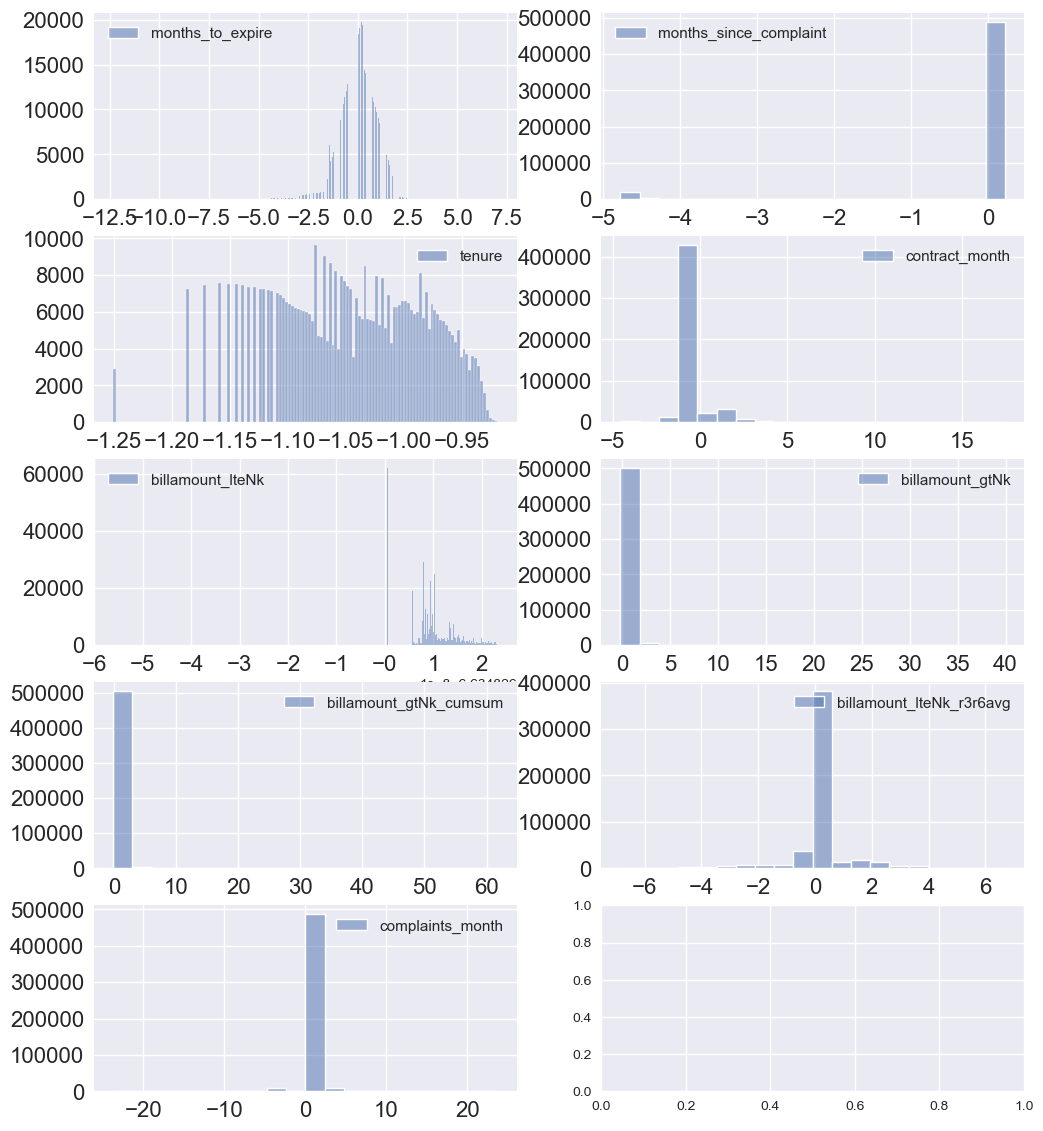

In [43]:
plot_variables=['months_to_expire','months_since_complaint','tenure','contract_month','billamount_lteNk', 'billamount_gtNk' , 
                'billamount_gtNk_cumsum','billamount_lteNk_r3r6avg','complaints_month']

plt.style.use('seaborn')
nrows,ncols = int(len(plot_variables)/2 + .5),2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,14))
plot_defaults_dict = bp.plot_defaults() # get matplotlib defaults dictionary from beautifulplots
sns.set(style="ticks")

rows_cols = [ (i,j) for i in range(0,nrows) for j in range(0,ncols)]
for n,ij in enumerate(rows_cols):
    if n < len(plot_variables):
        v = plot_variables[n]
        print(v, end =' ... ')
        x=dftmp_X[[v]]
        _ax=ax[ij[0]][ij[1]]
        g=sns.histplot(data=x,ax=_ax)
        bp.set_axisparams(plot_defaults_dict,_ax,g) # set the axis parameters

plt.show()

Import imblearn SMOTE and Pipeline

In [44]:
# sklearn pipeline vs imblearn pipeline
# if you need samplers use imblearn pipeline
# https://stackoverflow.com/questions/50376990/modulenotfounderror-no-module-named-imblearn  
# The imblearn package contains a lot of different samplers for easy over- or under-sampling of data. 
# These samplers can not be placed in a standard sklearn pipeline.
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE


Test Imbalance Adjustment

In [45]:
# imbalanced classes
counter = Counter(dftmp_Y.values.ravel())
print(f'class counts w/o class adjustment: {counter}')

imbalance_adjust = True
print(f'imbalance adjust flag = {imbalance_adjust}')

if imbalance_adjust == True:
       # define the transformation pipeline
       over = SMOTE(sampling_strategy=0.1) # target undersample ratio after oversampling
       under = RandomUnderSampler(sampling_strategy=0.5)  # target under sample ratio after undersampling
       steps = [('over', over), ('under', under)]
       class_balance_pipeline = Pipeline(steps=steps)

       # transform the dataset
       X, y = class_balance_pipeline.fit_resample(dftmp_X.values, dftmp_Y.values.ravel())
       counter = Counter(y)
       print(f'class counts after class resmapling: {counter}')
       
       # convert to DataFrame
       dfX_train = pd.DataFrame(X, columns = dftmp_X.columns)
       dfY_train = pd.DataFrame(y, columns = dftmp_Y.columns)
       
# imbalanced classes
counter = Counter(dftmp_Y.values.ravel())
print(f'class counts with class adjustment: {counter}')     


class counts w/o class adjustment: Counter({0: 504603, 1: 5508})
imbalance adjust flag = True
class counts after class resmapling: Counter({0: 100920, 1: 50460})
class counts with class adjustment: Counter({0: 504603, 1: 5508})


# ML Model Training Development (Cross Validation)

define get_traintest_idx

Sklearn imports

In [46]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# from sklearn import Pipeline ... we will use the imblearn Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score


/Users/albertogutierrez/miniconda3/envs/mynotebooks38/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


SMOTE imblearn imports

In [47]:
# sklearn pipeline vs imblearn pipeline
# if you need samplers use imblearn pipeline
# https://stackoverflow.com/questions/50376990/modulenotfounderror-no-module-named-imblearn  
# The imblearn package contains a lot of different samplers for easy over- or under-sampling of data. 
# These samplers can not be placed in a standard sklearn pipeline.
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE



Background on K-fold and Pipeines

Pipelines introduction to Sklearn pipeline and use with Grid Search  
* great intro to pipelines ... https://towardsdatascience.com/why-you-should-use-scikit-learn-pipelines-8754b4d1e375   
* sklearn pipline docs ... https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* pipelines and grid search ... https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

k-fold Cross Validation
* are yuo doing it right? ...https://towardsdatascience.com/k-fold-cross-validation-are-you-doing-it-right-e98cdf3e6690       
* https://pythonsimplified.com/how-to-use-k-fold-cv-and-gridsearchcv-with-sklearn-pipeline/
* Sklearn cross-validation ... https://scikit-learn.org/stable/modules/cross_validation.html

k-fold is to get a better assessment on how the model will handle unseen data
* after the model design a production model will be trained using all data
* how to choose the final classifier ... https://machinelearningmastery.com/train-final-machine-learning-model/   ... -> train on all the data
* k-fold model selection use the entire dataset to generate the final model ...  https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation


Cross Validation with Training Pipeline

In [48]:
# dfX and dfY ... copy dfml features to dfX and dfY
# note ... cannot use term_reasons since they happen after the fact

# define types of columns and features
num_features = ['tenure',  'billamount_lteNk', 'billamount_gtNk' ,  'billamount_gtNk_cumsum',  'contract_month', 'complaint_cnt', 
       'months_to_expire',  'complaints_month', 'months_since_complaint', 'billamount_lteNk_r3r6avg', 'billing_year']

cat_features = ['bandwidth','contract_status', 'is_new_customer_account',
       'with_phone_service',  'billing_month']

label = ['current_month_churn']

skewvars = ['tenure','billamount_lteNk' ]

all_features = num_features + cat_features

dfX = dfml[all_features].copy()
dfY = dfml[label].copy()
#year, month = 2022,6

#### Test Train Split
# We would evaluate our model with K-fold, but the final model will be trained on all available data as it is here

# K-fold is a more general re-sampling method for training and assessment tof the model ... good background in the following references
       # K-fold procedure ... https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
       # Background on k-fold CV
       # https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right
       # 
       # How to choose the final classifier model
       #   ... 
     
print('dfX')       
display(dfX.tail())
print('dfY')
display(dfY.tail())

# Choose Model
model_type = "lgbm"
if model_type == 'rf': 
       n_estimators=100
       max_depth = 6
       clf = RandomForestClassifier(n_estimators = n_estimators, min_samples_leaf=5) 
elif model_type == 'xgb': 
       n_estimators=75
       max_depth=6
       clf = XGBClassifier(n_estimators = n_estimators, max_depth=max_depth)
elif model_type == 'lgbm':
       # https://lightgbm.readthedocs.io/en/latest/Parameters.html
       # https://neptune.ai/blog/lightgbm-parameters-guide
       objective='tweedie'  # slightly worse performance
       max_depth=6
       clf = LGBMClassifier(max_depth=max_depth)
else: clf = None
print(f'model type = {model_type}\n')

# imblearn, SMOTE,  ReandomSpler 
# ... https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# ... transform the datase ... 
# ... X, y = pipeline.fit_resample(dfX_train.values, dfY_train.values.ravel())
# ... see above for example of X,y = pipeline.fit
over = SMOTE(sampling_strategy=0.1) # target undersample ratio after oversampling
under = RandomUnderSampler(sampling_strategy=0.5)  # target under sample ratio after undersampling

imbalance_adjust = True
print(f'imalance_adjust = {imbalance_adjust}')
if imbalance_adjust == True:
       steps = [('variable_transforms', churn_ml_transformer(num_features,cat_features,skewvars=skewvars)),
         ('over',over), ('under',under),  ('model',clf)]
else:
       steps = [('variable_transforms', churn_ml_transformer(num_features,cat_features,skewvars=skewvars)),
        ('model',clf)]

# define and fit the pipeline
pipeline=Pipeline(steps=steps)
pipeline.fit(dfX,dfY.values.ravel())

# perform cross validation
y_train = dfY.values.ravel()
cv = 10
print(f'cross validation, cv = 10')
print('cross validation ...')
scores = cross_val_score(estimator=pipeline,  X=dfX,  y=y_train, cv=cv, n_jobs=-1)  # scoring='neg_mean_squared_error
print('cross_val scores.mean, scores.std = ',scores.mean(),scores.std())
y_pred=pipeline.predict(dfX)
auc_score =roc_auc_score(y_train,y_pred)
print( f'train set auc score = {auc_score}' )


dfX


,tenure,billamount_lteNk,billamount_gtNk,billamount_gtNk_cumsum,contract_month,complaint_cnt,months_to_expire,complaints_month,months_since_complaint,billamount_lteNk_r3r6avg,billing_year,bandwidth,contract_status,is_new_customer_account,with_phone_service,billing_month
187529,17,1772.20,0.0,2352.9402,24.0,0,7,0.0,200,1.044286,2022,25M,In Contract,0,False,6
448826,26,1111.15,0.0,0.0000,24.0,0,22,0.0,14,1.409772,2022,100M,In Contract,0,False,6
187506,150,1163.80,0.0,0.0000,24.0,0,7,0.0,200,1.000000,2022,100M,In Contract,0,False,6
448789,26,1105.30,0.0,0.0000,24.0,0,22,0.0,200,1.403249,2022,1000M,In Contract,0,False,6
510124,1,1000.00,0.0,0.0000,0.0,0,0,0.0,200,1.000000,2022,1000M,Out of Contract,1,False,6


dfY


,current_month_churn
187529,0
448826,0
187506,0
448789,0
510124,0


model type = lgbm

imalance_adjust = True
cross validation, cv = 10
cross validation ...
cross_val scores.mean, scores.std =  0.9536257617850155 0.018546574665934523
train set auc score = 0.9074228194457511


# Model Performance on Last Month June 2022 (Holdout/Test Set)

get_train_idx

In [49]:
# get training and test index function
def get_traintest_idx(df, test_year, test_month):

    # train_idx
    if test_month > 1 and test_month <= 12: 
        train_idx = df[ (df["billing_year"] == test_year & (df["billing_month"] < test_month )) | (df["billing_year"] < test_year ) ].index
        test_idx = df[ (df["billing_year"] == test_year) & (df["billing_month"] ==  test_month )].index
        
    if test_month == 1:
        train_idx = df[ df["billing_year"] < test_year].index
        test_idx = df[ (df["billing_year"] == test_year) & (df["billing_month"] ==  test_month )].index
    
    return train_idx, test_idx

Test, Train, and Predict on Last Month as Test Set

In [50]:
test_year, test_month = 2022,6
train_idx, test_idx = get_traintest_idx(dfX,test_year, test_month)

dfX_train = dfX.loc[train_idx]
dfY_train = dfY.loc[train_idx]
dfX_test = dfX.loc[test_idx]
dfY_test = dfY.loc[test_idx]

display(dfX_train.tail())
display(dfX_test.head())
display(dfY.head())

# y_train and ytrain_pred
y_train = dfY_train.values.ravel()
pipeline.fit(dfX_train,y_train)
y_train_pred=pipeline.predict(dfX_train)

# y_pred and y_test
y_pred = pipeline.predict(dfX_test)
y_test = dfY_test.values.ravel()


,tenure,billamount_lteNk,billamount_gtNk,billamount_gtNk_cumsum,contract_month,complaint_cnt,months_to_expire,complaints_month,months_since_complaint,billamount_lteNk_r3r6avg,billing_year,bandwidth,contract_status,is_new_customer_account,with_phone_service,billing_month
18309,45,1000.00,1141.92,1141.9200,30.0,0,-15,0.0,200,1.284768,2021,100M,Out of Contract,0,False,12
234963,33,1163.80,0.00,0.0000,24.0,1,16,1.0,1,1.000000,2021,100M,In Contract,0,False,12
349950,110,1198.90,0.00,0.0000,24.0,0,22,-1.0,200,1.183216,2021,100M,In Contract,0,True,12
233911,9,1310.05,0.00,1060.2306,24.0,0,16,0.0,200,1.000000,2021,100M,In Contract,0,False,12
277991,7,1191.88,0.00,0.0000,24.0,0,18,0.0,200,1.000000,2021,100M,In Contract,0,False,12


,tenure,billamount_lteNk,billamount_gtNk,billamount_gtNk_cumsum,contract_month,complaint_cnt,months_to_expire,complaints_month,months_since_complaint,billamount_lteNk_r3r6avg,billing_year,bandwidth,contract_status,is_new_customer_account,with_phone_service,billing_month
7526,109,1140.40,0.0,0.0000,28.0,0,-61,0.0,200,1.000000,2022,25M,Out of Contract,0,False,6
491770,95,1300.69,0.0,1361.6928,24.0,0,25,0.0,200,1.000000,2022,25M,In Contract,0,True,6
500103,9,1463.32,0.0,0.0000,36.0,0,28,0.0,200,1.005408,2022,1000M,In Contract,0,False,6
490590,60,1196.56,0.0,0.0000,24.0,0,25,0.0,200,1.000000,2022,1000M,In Contract,0,False,6
490523,72,1266.76,0.0,0.0000,24.0,0,25,0.0,200,1.000000,2022,100M,In Contract,0,False,6


,current_month_churn
362346,0
144910,0
289618,0
15851,0
72812,0


performance function

In [51]:
# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
def scores(y_test,y_pred):
    scores_dict = {}
    scores_dict['accuracy']= accuracy_score(y_test, y_pred)
    scores_dict['auc'] = roc_auc_score(y_test,y_pred)
    scores_dict['tn'], scores_dict['fp'], scores_dict['fn'], scores_dict['tp']  = confusion_matrix(y_test,y_pred).ravel()
    scores_dict['sensitivity_recall_tpr'] = scores_dict['tp']/(scores_dict['tp']+ scores_dict['fn'])
    scores_dict['specicifity_selectivity_tnr'] = scores_dict['tn']/(scores_dict['tn']+ scores_dict['fp'])
    return scores_dict

Classification Scores

there are 1302 (tp = 213 + fp =1089) predicted churners for June 2022

In [52]:
# Classification Scores

print('training performance')
scores_dict = scores(y_train, y_train_pred)
for k in scores_dict.keys(): print(f'  {k} = {scores_dict[k]}')

print('\ntest performance')
scores_dict = scores(y_test, y_pred)
for k in scores_dict.keys(): print(f'  {k} = {scores_dict[k]}')


training performance
  accuracy = 0.9641166941938762
  auc = 0.9065980848301182
  tn = 360924
  fp = 12960
  fn = 597
  tp = 3327
  sensitivity_recall_tpr = 0.8478593272171254
  specicifity_selectivity_tnr = 0.9653368424431107

test performance
  accuracy = 0.9554108442997332
  auc = 0.9030973836285214
  tn = 20918
  fp = 949
  fn = 37
  tp = 209
  sensitivity_recall_tpr = 0.8495934959349594
  specicifity_selectivity_tnr = 0.9566012713220835


In [53]:
print(f'predicted churn rate = {y_pred.sum()/y_pred.shape[0]}')

predicted churn rate = 0.052367385700719034


AUC Plot

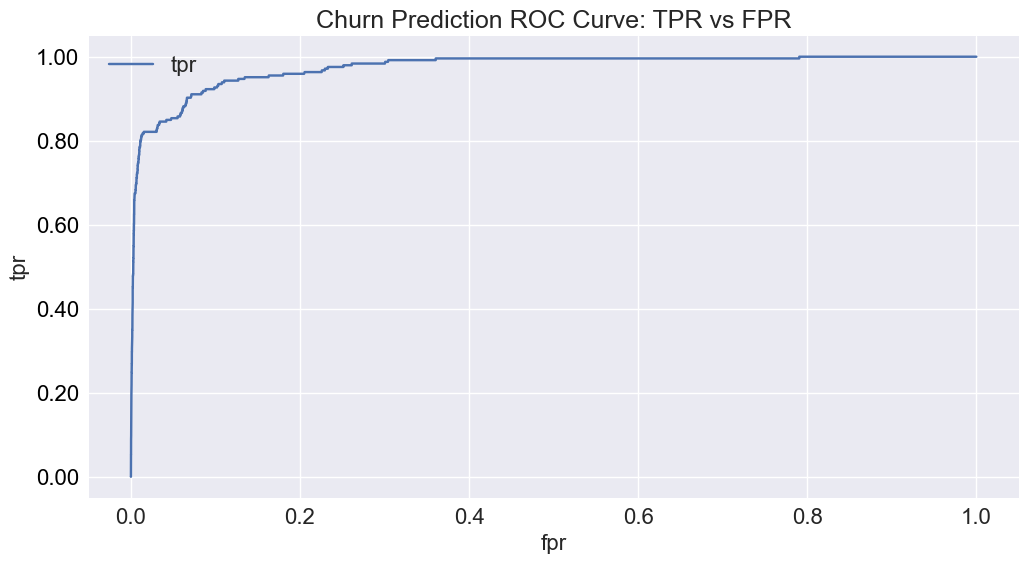

,fpr,tpr,thresholds
0,0.000000,0.00000,1.989590
1,0.000046,0.00000,0.989590
2,0.000046,0.00813,0.988667
3,0.000091,0.00813,0.988461
4,0.000091,0.01626,0.988113


,fpr,tpr,thresholds
5203,0.996982,1.0,0.000201
5204,0.997073,1.0,0.000201
5205,0.997622,1.0,0.000191
5206,0.997713,1.0,0.000190
5207,1.000000,1.0,0.000087


In [54]:

# https://www.statology.org/plot-roc-curve-python/ 
# https://www.w3schools.com/python/python_ml_auc_roc.asp
y_pred_proba = pipeline.predict_proba(dfX_test)[::,1] # 1 --> prob of churn
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

df_roc=pd.DataFrame(data={'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
bp.lineplot(df_roc, x='fpr',y='tpr', figsize=(12,6), 
            x_axis_label = "fpr", y_axis_label='tpr', 
            title = 'Churn Prediction ROC Curve: TPR vs FPR')

display(df_roc.head())
display(df_roc.tail())


# Feature Importances

Get information from inside the pipeline

In [55]:

#https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
print(pipeline.steps)
pipeline.steps[0][1].Xcolumns
print(pipeline.steps[3])
pipeline.steps[3][1].feature_importances_

[('variable_transforms', churn_ml_transformer(cat_features=['bandwidth', 'contract_status',
                                   'is_new_customer_account',
                                   'with_phone_service', 'billing_month'],
                     num_features=['tenure', 'billamount_lteNk',
                                   'billamount_gtNk', 'billamount_gtNk_cumsum',
                                   'contract_month', 'complaint_cnt',
                                   'months_to_expire', 'complaints_month',
                                   'months_since_complaint',
                                   'billamount_lteNk_r3r6avg', 'billing_year'],
                     skewvars=['tenure', 'billamount_lteNk'])), ('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', LGBMClassifier(max_depth=6))]
('model', LGBMClassifier(max_depth=6))


array([384, 263,  84, 109, 207,   8, 778,  19,  18, 207,  54,  39,  30,
        83,  12,  23,  23,  36,  16,  15,   7,   2,   2,   0,  80,   4,
        27,  15,  25,  39,  49,  17,  51,  51,  74,  44,  32,  55],
      dtype=int32)

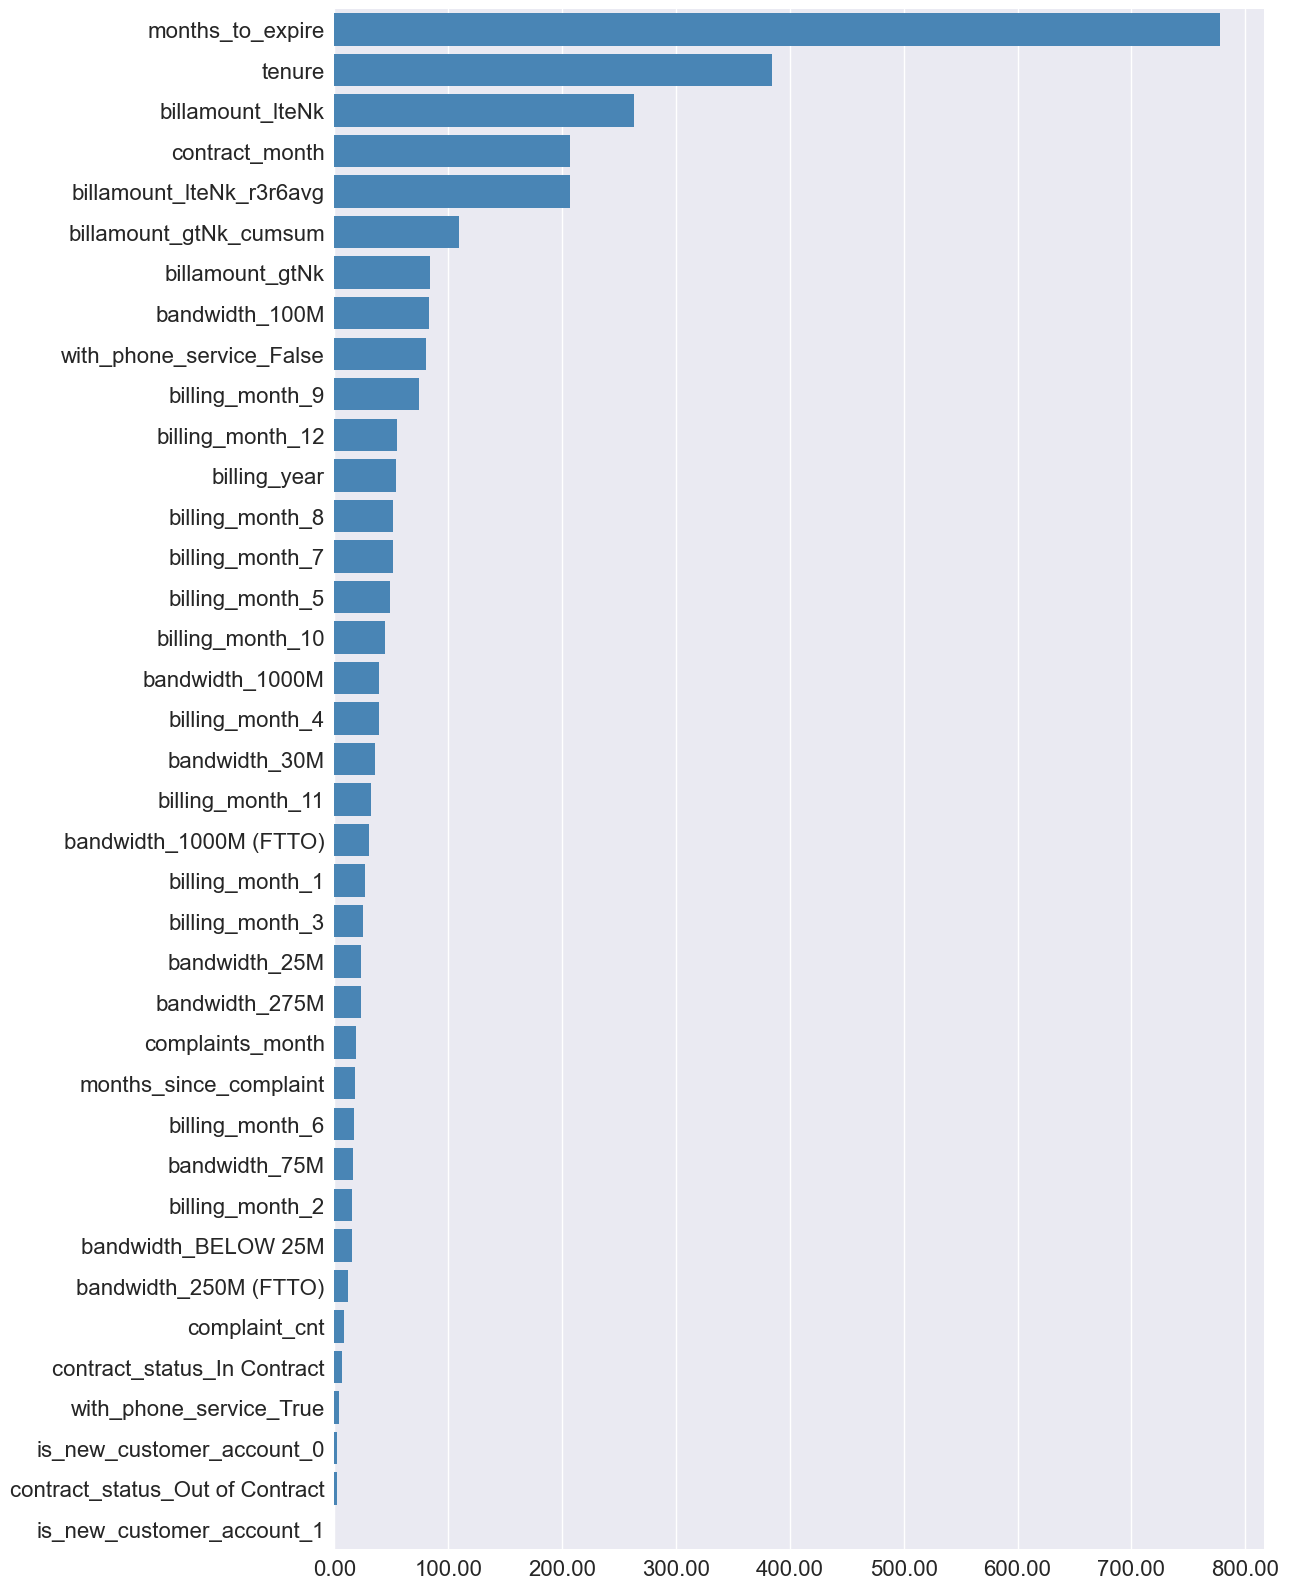

,index,values
0,months_to_expire,778
1,tenure,384
2,billamount_lteNk,263
3,contract_month,207
4,billamount_lteNk_r3r6avg,207
5,billamount_gtNk_cumsum,109
6,billamount_gtNk,84
7,bandwidth_100M,83
8,with_phone_service_False,80
9,billing_month_9,74


In [56]:

df_importances = pd.DataFrame(data=pipeline.steps[3][1].feature_importances_, index = pipeline.steps[0][1].Xcolumns, columns=['values']).sort_values('values',ascending=False).reset_index()
color =color = [51/235,125/235,183/235]
bp.barplot(df_importances, bar_columns='index', bar_values='values', barorientation='h', color=color, figsize=(12,20))
plt.show()

df_importances


# Production Model -  trained on all data - Churn Pred and Churn Risk


Predict Churn and Churn Risk on  Unseen Month, July 2022

Churn Risk Histogram

Generate the July input Data

Pipeline receives as input all the ml features ... note it will select the numerical, categorical features as specified in the pipeline setup



In [57]:
dfml

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.20,1000M (FTTO),<NA>,0,False,0,0,202007,2020,7,40,In Contract,False,0.0,0,200,1421.20,0.0,421.200,421.2000,1.000000,0.0000
144910,75355818CNZO000021688,129,2020-11-26,2022-11-25,24.0,604.89,100M,<NA>,0,True,0,0,202007,2020,7,28,In Contract,False,0.0,0,200,1604.89,0.0,604.890,604.8900,1.000000,0.0000
289618,90416678CNZO000030320,108,2021-07-02,2023-07-01,24.0,210.60,100M,<NA>,0,True,0,0,202007,2020,7,36,In Contract,False,0.0,0,200,1210.60,0.0,210.600,210.6000,1.000000,0.0000
15851,94200409CPRL000074467,30,2018-01-28,2020-07-27,30.0,362.70,100M,<NA>,0,False,0,0,202007,2020,7,0,In Contract,False,0.0,0,200,1362.70,0.0,362.700,362.7000,1.000000,0.0000
72812,95482972CNZO000086955,2,2020-06-14,2022-06-13,24.0,105.30,100M,<NA>,0,False,0,0,202007,2020,7,23,In Contract,False,0.0,0,200,1105.30,0.0,105.300,105.3000,1.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,0,False,0,0,202206,2022,6,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,0,False,0,0,202206,2022,6,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000


Train Model on All X Data

In [58]:
# Train on all the Data
dfXY = dfml.copy()
_=pipeline.fit(dfX,dfY.values.ravel())

Create dfX_pred for prediction  
... this is fake and not accurate   
... in reality receive a new set of account data   
... we are faking it in order to create some simulated data for BI dashboard  

functions for creating dfXY_pred data

In [59]:

def get_yearmonth_func(df, year, month):
  idx=dfml[ (df["billing_year"]==year) & (df["billing_month"] == month)].index # indexes corresponding to year and month
  df = df.loc[idx]  # only include rows from year and month 
  return df

def remove_churned_func(df):
  idx =df[df['current_month_churn']==0].index
  df = df.loc[idx]
  return df

def update_billing_year_month_apply(r):
  if r['billing_month']  == 12: 
    r['billing_year'] = r['billing_year'] + 1
    r['billing_month'] = 1
  else: 
    r['billing_month'] += 1
    
  r['billing_yearmonth'] = 100*r['billing_year']+r['billing_month']
  return r

def update_tenure_func(df):
    df['tenure'] = df['tenure'] + 1
    return df
  
def update_billing_year_month_func(df):
  return df.apply(lambda r: update_billing_year_month_apply(r),axis=1)

create dfXY_pred

In [60]:

year,month = 2022,6 # df final year and month for dfXY_pred
if month == 12: pred_year, pred_month = year + 1, 1
else: pred_year, pred_month = year, month+1

print('create dfXY_pred')
dfXY_pred = get_yearmonth_func(dfml,year,month).copy()

print('remove known churners ...')
dfXY_pred = remove_churned_func(dfXY_pred).copy()

print ('update billing_year_month ...')
dfXY_pred = update_billing_year_month_func(dfXY_pred)

print('update tenure ...')
dfXY_pred = update_tenure_func(dfXY_pred)

print('dfXY_pred ...')
display(dfXY_pred)

print('update contract status')
dfXY_pred = contract_status_func(dfXY_pred)

# churn prediction
print('predict ... ')
churn_pred = pipeline.predict(dfXY_pred)
print(f'predicted churn = {churn_pred.sum()}')
print(f'predicted churn rate = {churn_pred.sum()/churn_pred.shape[0]}')


create dfXY_pred
remove known churners ...
update billing_year_month ...
update tenure ...
dfXY_pred ...


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum
7526,91926493CNZO000055342,110,2015-02-01,2017-05-30,28.0,140.40,25M,NaN,0,False,0,0,202207,2022,7,-61,Out of Contract,False,0.0,0,200,1140.40,0.0,140.400,140.4000,1.000000,0.0000
491770,93072114CNZO000059890,96,2022-07-18,2024-07-17,24.0,300.69,25M,NaN,0,True,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1300.69,0.0,300.690,300.6900,1.000000,1361.6928
500103,95842225CNZO000091038,10,2021-10-03,2024-10-02,36.0,463.32,1000M,NaN,0,False,0,0,202207,2022,7,28,In Contract,False,0.0,0,200,1463.32,0.0,463.320,460.8279,1.005408,0.0000
490590,94350576CNZO000072265,61,2022-07-15,2024-07-14,24.0,196.56,1000M,NaN,0,False,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1196.56,0.0,196.560,196.5600,1.000000,0.0000
490523,94086790CNZO000067978,73,2022-07-15,2024-07-14,24.0,266.76,100M,NaN,0,False,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1266.76,0.0,266.760,266.7600,1.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,18,2021-01-31,2023-01-30,24.0,772.20,25M,NaN,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402
448826,95417069CNZO000086078,27,2022-04-18,2024-04-17,24.0,111.15,100M,NaN,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000
187506,75524694CNZO000022583,151,2021-01-31,2023-01-30,24.0,163.80,100M,NaN,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000
448789,95398418CNZO000085884,27,2022-04-18,2024-04-17,24.0,105.30,1000M,NaN,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000


update contract status
predict ... 
predicted churn = 416
predicted churn rate = 0.019024100242374355


Create df_pred with Churn Risk and Churn Prob

In [61]:

# Churn Prediction for Next Month (Unforseen Data)
y_next_pred = pipeline.predict(dfXY_pred)

# Retention and Churn Probabilities
class_probs= pipeline.predict_proba(dfXY_pred)

# pred data frame
df_pred = dfXY_pred.copy()
df_pred['churn_pred'] = y_next_pred
df_pred['retention_prob'] = class_probs[:,0]
df_pred['churn_prob'] = class_probs[:,1]

# add billing_yearmonth_date
df_pred['billing_yearmonth_date']=pd.to_datetime( df_pred['billing_yearmonth'].astype(str) +'01' ) # 01 -> first day

display(df_pred)

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum,churn_pred,retention_prob,churn_prob,billing_yearmonth_date
7526,91926493CNZO000055342,110,2015-02-01,2017-05-30,28.0,140.40,25M,<NA>,0,False,0,0,202207,2022,7,-61,Out of Contract,False,0.0,0,200,1140.40,0.0,140.400,140.4000,1.000000,0.0000,0,0.909644,0.090356,2022-07-01
491770,93072114CNZO000059890,96,2022-07-18,2024-07-17,24.0,300.69,25M,<NA>,0,True,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1300.69,0.0,300.690,300.6900,1.000000,1361.6928,0,0.999604,0.000396,2022-07-01
500103,95842225CNZO000091038,10,2021-10-03,2024-10-02,36.0,463.32,1000M,<NA>,0,False,0,0,202207,2022,7,28,In Contract,False,0.0,0,200,1463.32,0.0,463.320,460.8279,1.005408,0.0000,0,0.937794,0.062206,2022-07-01
490590,94350576CNZO000072265,61,2022-07-15,2024-07-14,24.0,196.56,1000M,<NA>,0,False,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1196.56,0.0,196.560,196.5600,1.000000,0.0000,0,0.998827,0.001173,2022-07-01
490523,94086790CNZO000067978,73,2022-07-15,2024-07-14,24.0,266.76,100M,<NA>,0,False,0,0,202207,2022,7,25,In Contract,False,0.0,0,200,1266.76,0.0,266.760,266.7600,1.000000,0.0000,0,0.999105,0.000895,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187529,75632331CNZO000089740,18,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402,0,0.599015,0.400985,2022-07-01
448826,95417069CNZO000086078,27,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000,0,0.996381,0.003619,2022-07-01
187506,75524694CNZO000022583,151,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000,0,0.993332,0.006668,2022-07-01
448789,95398418CNZO000085884,27,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000,0,0.997473,0.002527,2022-07-01


Customer Churn Rate

In [62]:
df_pred[df_pred['churn_pred']==1].shape[0]/df_pred.shape[0]

0.019024100242374355

Churn Probability Histogram

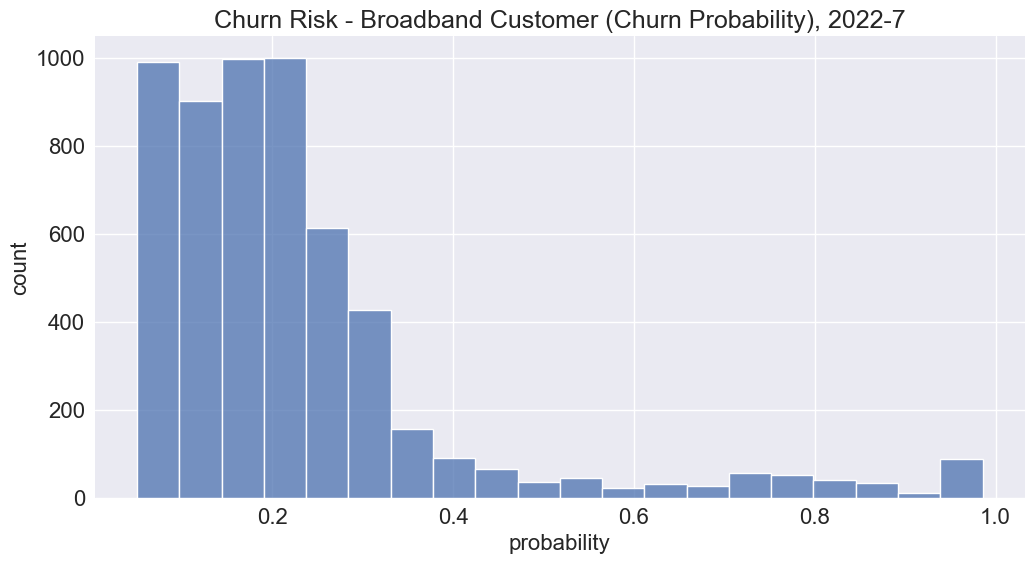

In [63]:
plt.style.use('seaborn')
nrows,ncols = 1,1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,6))
plot_options = bp.plot_defaults() # get matplotlib defaults dictionary from beautifulplots
sns.set(style="ticks")

df_cprob = df_pred[ df_pred['churn_prob'] > 0.05 ]
g=sns.histplot(data=df_cprob['churn_prob'],bins=20  ,ax=ax)
plot_options['title']=f'Churn Risk - Broadband Customer (Churn Probability), {pred_year}-{pred_month}'
plot_options['y_axis_label']='count'
plot_options['x_axis_label']='probability'
bp.set_axisparams(plot_options,ax,g) # set the axis parameters

plt.show()

# Save BI Data

In [64]:
display(dfe.tail())

display(df_pred.tail())

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned
187529,75632331CNZO000089740,17,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,7,In Contract,NaN,False
448826,95417069CNZO000086078,26,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,22,In Contract,NaN,False
187506,75524694CNZO000022583,150,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,7,In Contract,NaN,False
448789,95398418CNZO000085884,26,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,<NA>,0,False,False,0,202206,2022,6,2022-06-01,22,In Contract,NaN,False
510124,96449087CNZO000096317,1,NaT,NaT,0.0,0.00,1000M,<NA>,<NA>,0,False,False,1,202206,2022,6,2022-06-01,0,Out of Contract,NaN,False


,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,months_to_expire,contract_status,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum,churn_pred,retention_prob,churn_prob,billing_yearmonth_date
187529,75632331CNZO000089740,18,2021-01-31,2023-01-30,24.0,772.20,25M,<NA>,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1772.20,0.0,855.270,819.0000,1.044286,2352.9402,0,0.599015,0.400985,2022-07-01
448826,95417069CNZO000086078,27,2022-04-18,2024-04-17,24.0,111.15,100M,<NA>,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,11,14,1111.15,0.0,251.511,178.4055,1.409772,0.0000,0,0.996381,0.003619,2022-07-01
187506,75524694CNZO000022583,151,2021-01-31,2023-01-30,24.0,163.80,100M,<NA>,0,False,0,0,202207,2022,7,7,In Contract,False,0.0,0,200,1163.80,0.0,163.800,163.8000,1.000000,0.0000,0,0.993332,0.006668,2022-07-01
448789,95398418CNZO000085884,27,2022-04-18,2024-04-17,24.0,105.30,1000M,<NA>,0,False,0,0,202207,2022,7,22,In Contract,False,0.0,0,200,1105.30,0.0,247.611,176.4555,1.403249,0.0000,0,0.997473,0.002527,2022-07-01
510124,96449087CNZO000096317,2,NaT,NaT,0.0,0.00,1000M,<NA>,0,False,0,1,202207,2022,7,0,Out of Contract,False,0.0,0,200,1000.00,0.0,0.000,0.0000,1.000000,0.0000,0,0.957569,0.042431,2022-07-01


merge dfe (enhanced) with predictions

In [65]:

dfe_pred = pd.concat([dfe,df_pred]).sort_values('billing_yearmonth_date',ascending=True)
display(dfe_pred)

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum,churn_pred,retention_prob,churn_prob
362346,94933785CPRL000083437,9,2021-11-09,2023-11-08,24.0,421.2000,1000M (FTTO),<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,40,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440970,94578804CNZO000066623,53,2022-04-01,2024-03-30,24.0,173.1600,25M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,44,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33817,90722299CNZO000055754,85,2019-07-08,2021-07-07,24.0,154.4400,25M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,12,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48481,94486560CNZO000074003,31,2019-12-23,2021-12-22,24.0,257.4000,100M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,17,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503512,94813862CNZO000078991,20,2021-10-01,2025-01-31,40.0,91.1781,25M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,54,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341449,93925410CNZO000065723,79,2021-10-01,2023-09-30,24.0,161.4600,100M,<NA>,<NA>,0,False,0,0,202207,2022,7,2022-07-01,15,In Contract,NaN,False,0.0,0.0,200.0,1161.46,0.00,161.46,161.46,1.0,1050.66,0.0,0.997803,0.002197
341461,94083722CNZO000068826,70,2020-10-01,2023-09-30,36.0,2699.1900,100M,<NA>,<NA>,0,False,0,0,202207,2022,7,2022-07-01,15,In Contract,NaN,False,0.0,0.0,200.0,1000.00,2699.19,2699.19,2699.19,1.0,103440.87,0.0,0.995015,0.004985
341495,94115664CNZO000068281,72,2021-10-01,2023-09-30,24.0,170.8200,100M,<NA>,<NA>,0,True,0,0,202207,2022,7,2022-07-01,15,In Contract,NaN,False,0.0,0.0,200.0,1170.82,0.00,170.82,170.82,1.0,0.00,0.0,0.996546,0.003454
341358,93868248CNZO000064834,82,2021-08-01,2023-09-30,26.0,421.2000,30M,<NA>,<NA>,0,True,0,0,202207,2022,7,2022-07-01,15,In Contract,NaN,False,0.0,0.0,200.0,1421.20,0.00,421.20,421.20,1.0,0.00,0.0,0.998192,0.001808


In [66]:
# save  dataframe
filename='broadbandservice_churn_with_pred.csv'
print(f'{datafolder}/{filename} ...')
dfe_pred.to_csv(f'{datafolder}/{filename}',index=False)

./data_broadband_service//broadbandservice_churn_with_pred.csv ...


In [115]:
dfe_pred[dfe_pred['bill_amount']==0].sort_values('billing_yearmonth',ascending=False)

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,last_service_year_month,months_to_expire,contract_status,months_since_first_churn,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum,churn_pred,retention_prob,churn_prob
510124,96449087CNZO000096317,2,NaT,NaT,0.0,0.0,1000M,<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,2022-06-01,0,Out of Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.953225,0.046775
469632,96509765CNZO000096920,2,2022-05-27,2024-05-26,24.0,0.0,1000M (FTTO),<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,2022-06-01,23,In Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995276,0.004724
470485,94673571HG16HG00096856,2,2022-05-29,2024-05-28,24.0,0.0,100M,<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,2022-06-01,23,In Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995635,0.004365
470079,96446463CNZO000096283,2,2022-05-28,2024-05-27,24.0,0.0,1000M (FTTO),<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,2022-06-01,23,In Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995276,0.004724
470080,96446463CNZO000096284,2,2022-05-28,2024-05-27,24.0,0.0,1000M (FTTO),<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,2022-06-01,23,In Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995276,0.004724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489254,95513164CNZO000087221,1,2022-07-10,2024-07-09,24.0,0.0,1000M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,2022-06-01,48,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489247,95513099CNZO000087220,1,2022-07-10,2024-07-09,24.0,0.0,100M,<NA>,<NA>,0,False,0,0,202007,2020,7,2020-07-01,2022-06-01,48,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493545,95477972CPRL000087034,0,2022-07-24,2024-07-23,24.0,0.0,100M,<NA>,<NA>,0,False,0,1,202007,2020,7,2020-07-01,2022-06-01,48,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493565,95514634CNZO000087226,0,2022-07-24,2024-07-23,24.0,0.0,1000M (FTTO),<NA>,<NA>,0,False,0,1,202007,2020,7,2020-07-01,2022-06-01,48,In Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
dfe_pred[dfe_pred['account_no']=='96449087CNZO000096317'].sort_values('billing_yearmonth',ascending=False)

,account_no,tenure,contract_start_date,contract_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,billing_yearmonth,billing_year,billing_month,billing_yearmonth_date,months_to_expire,contract_status,months_since_first_churn,customer_is_churned,complaints_month,complaint_id,months_since_complaint,billamount_lteNk,billamount_gtNk,billamount_lteNk_r3avg,billamount_lteNk_r6avg,billamount_lteNk_r3r6avg,billamount_gtNk_cumsum,churn_pred,retention_prob,churn_prob
510124,96449087CNZO000096317,2,NaT,NaT,0.0,0.0,1000M,<NA>,<NA>,0,False,0,1,202207,2022,7,2022-07-01,0,Out of Contract,NaN,False,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.957569,0.042431
510124,96449087CNZO000096317,1,NaT,NaT,0.0,0.0,1000M,<NA>,<NA>,0,False,0,1,202206,2022,6,2022-06-01,0,Out of Contract,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# References


* Sireesha Pulipati,, Data Storytelling with Google Looker Studio, Customer Churn Analysis, dataset at https://github.com/PacktPublishing/Data-Storytelling-with-Google-Data-Studio/blob/master/customer_churn_data.zip

* Jason Brownlee, March 17,2021, SMOTE for Imbalanced Classification with Python, https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/